# Figs of WMT tendency terms
## Table Of Contents: <a class="anchor" id="top"> </a>
* [Annual-mean global fig of each term](#first-bullet)
* [Global timeseries of each term](#second-bullet)
* [Monthly Climatology](#third-bullet)
* [Anomaly](#fourth-bullet)

> Note: the time dimension is for entire 40-yr run of CESM data

In [4]:
from dask_gateway import Gateway
gateway = Gateway()
options = gateway.cluster_options()

# set the options programatically, or through their HTML repr
options.worker_memory = 30  # 10 GB of memory per worker.

# Create a cluster with those options
cluster = gateway.new_cluster(options)
cluster.scale(30)
client = cluster.get_client()

In [37]:
client

<Client: 'tls://10.1.36.2:8786' processes=30 threads=60, memory=900.00 GiB>

In [ ]:
cluster.close()
client.close()

In [1]:
import xarray as xr
import numpy as np
import dask.array as dsa
import matplotlib.pyplot as plt
import fastjmd95
import pop_tools
import gcsfs
from xhistogram.xarray import histogram

In [2]:
import json
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

def open_ds(path):
    ds = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/basin-histograms/'+
                                              path +'_histograms.zarr'))
    return ds
    
natl = open_ds('natl')
satl = open_ds('satl')
npac = open_ds('npac')
spac = open_ds('spac')
ind = open_ds('ind')
arc = open_ds('arc')
south = open_ds('south')

global_hist = xr.open_zarr(gcfs_w_token.get_mapper('pangeo-tmp/stb2145/CESM/datasets/histograms.zarr'))

# 1) Annual-mean global fig <a class='anchor' id='first-bullet'> </a>
(use logarithmic scale on y-axis)

In [7]:
def ann_mean1(ds):
    (ds/1e6).mean('time').to_array().plot(col='variable', col_wrap=2, figsize=(20, 12));

In [33]:
def ann_mean2(ds):
    fig = plt.figure(figsize=(12,5))
    line_colors=['blue', 'k', 'orange', 'green'] #order of cab, rho, sss, sst
    for (i,j) in zip(list(ds.data_vars), line_colors):
        (ds[i].mean('time')/1e6).plot(label=f'{i}', color=j)
    plt.legend()
    plt.ylabel(r'Transformation (Sv)', fontsize=16)
    plt.grid()
    plt.title('Annual Mean Transformation Terms', fontsize=20);

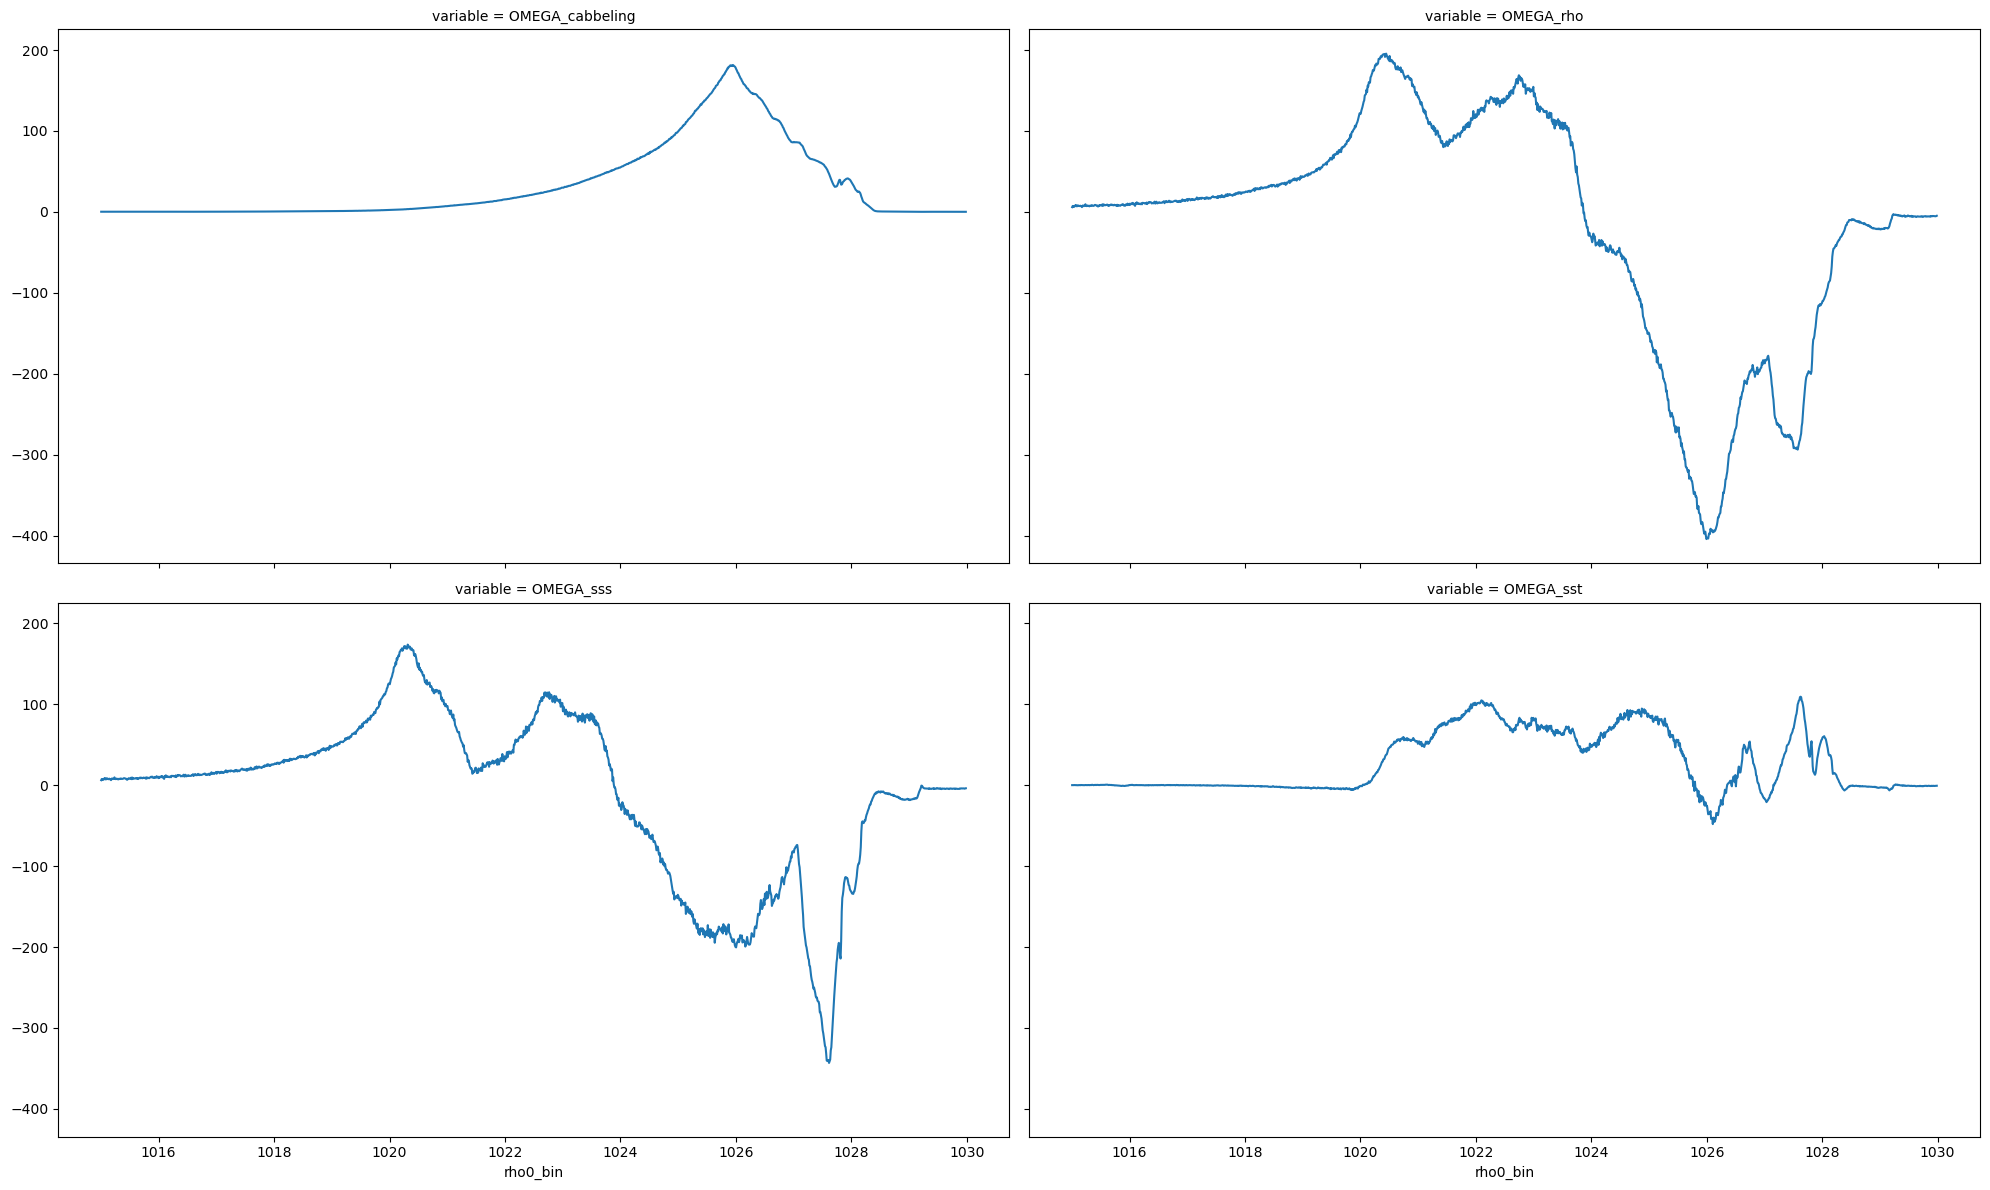

In [8]:
ann_mean1(global_hist)

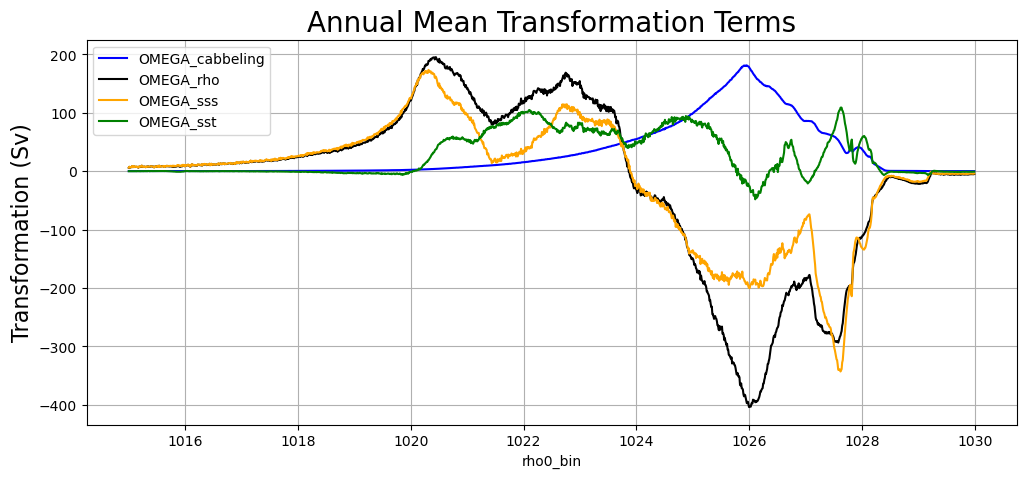

In [38]:
ann_mean2(global_hist)

## 1a) Annual-mean North ATL fig

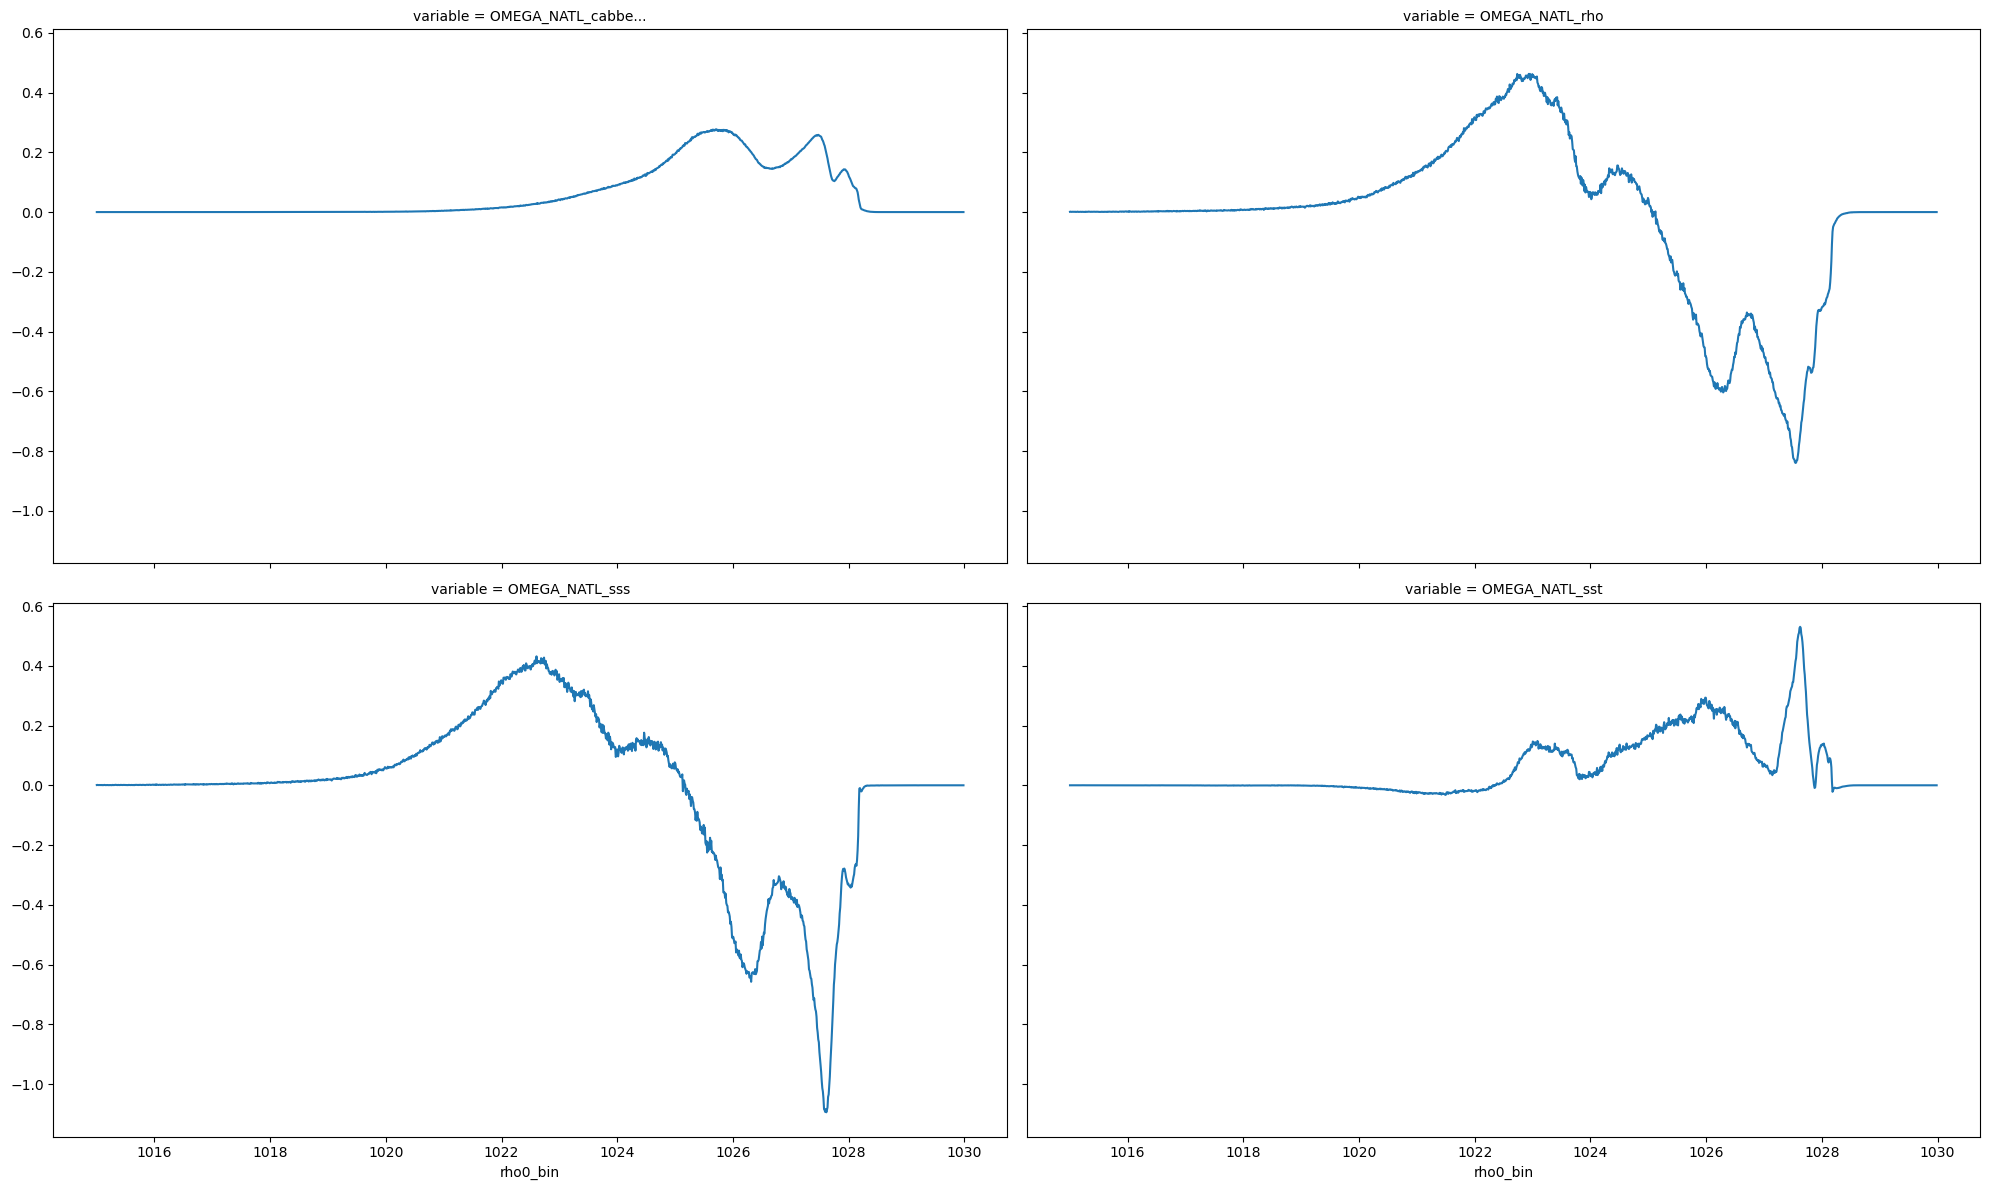

In [13]:
ann_mean1(natl)

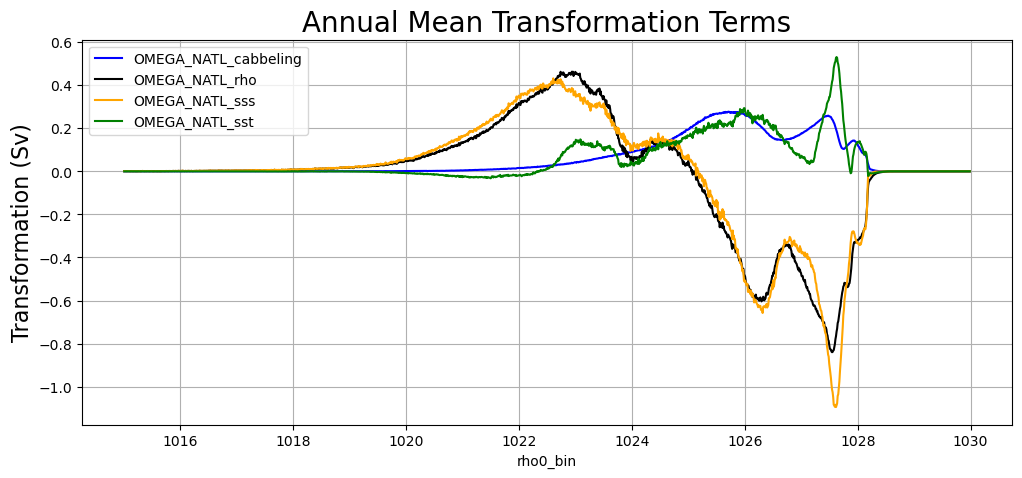

In [39]:
ann_mean2(natl)

## 1b) Annual-mean South ATL fig

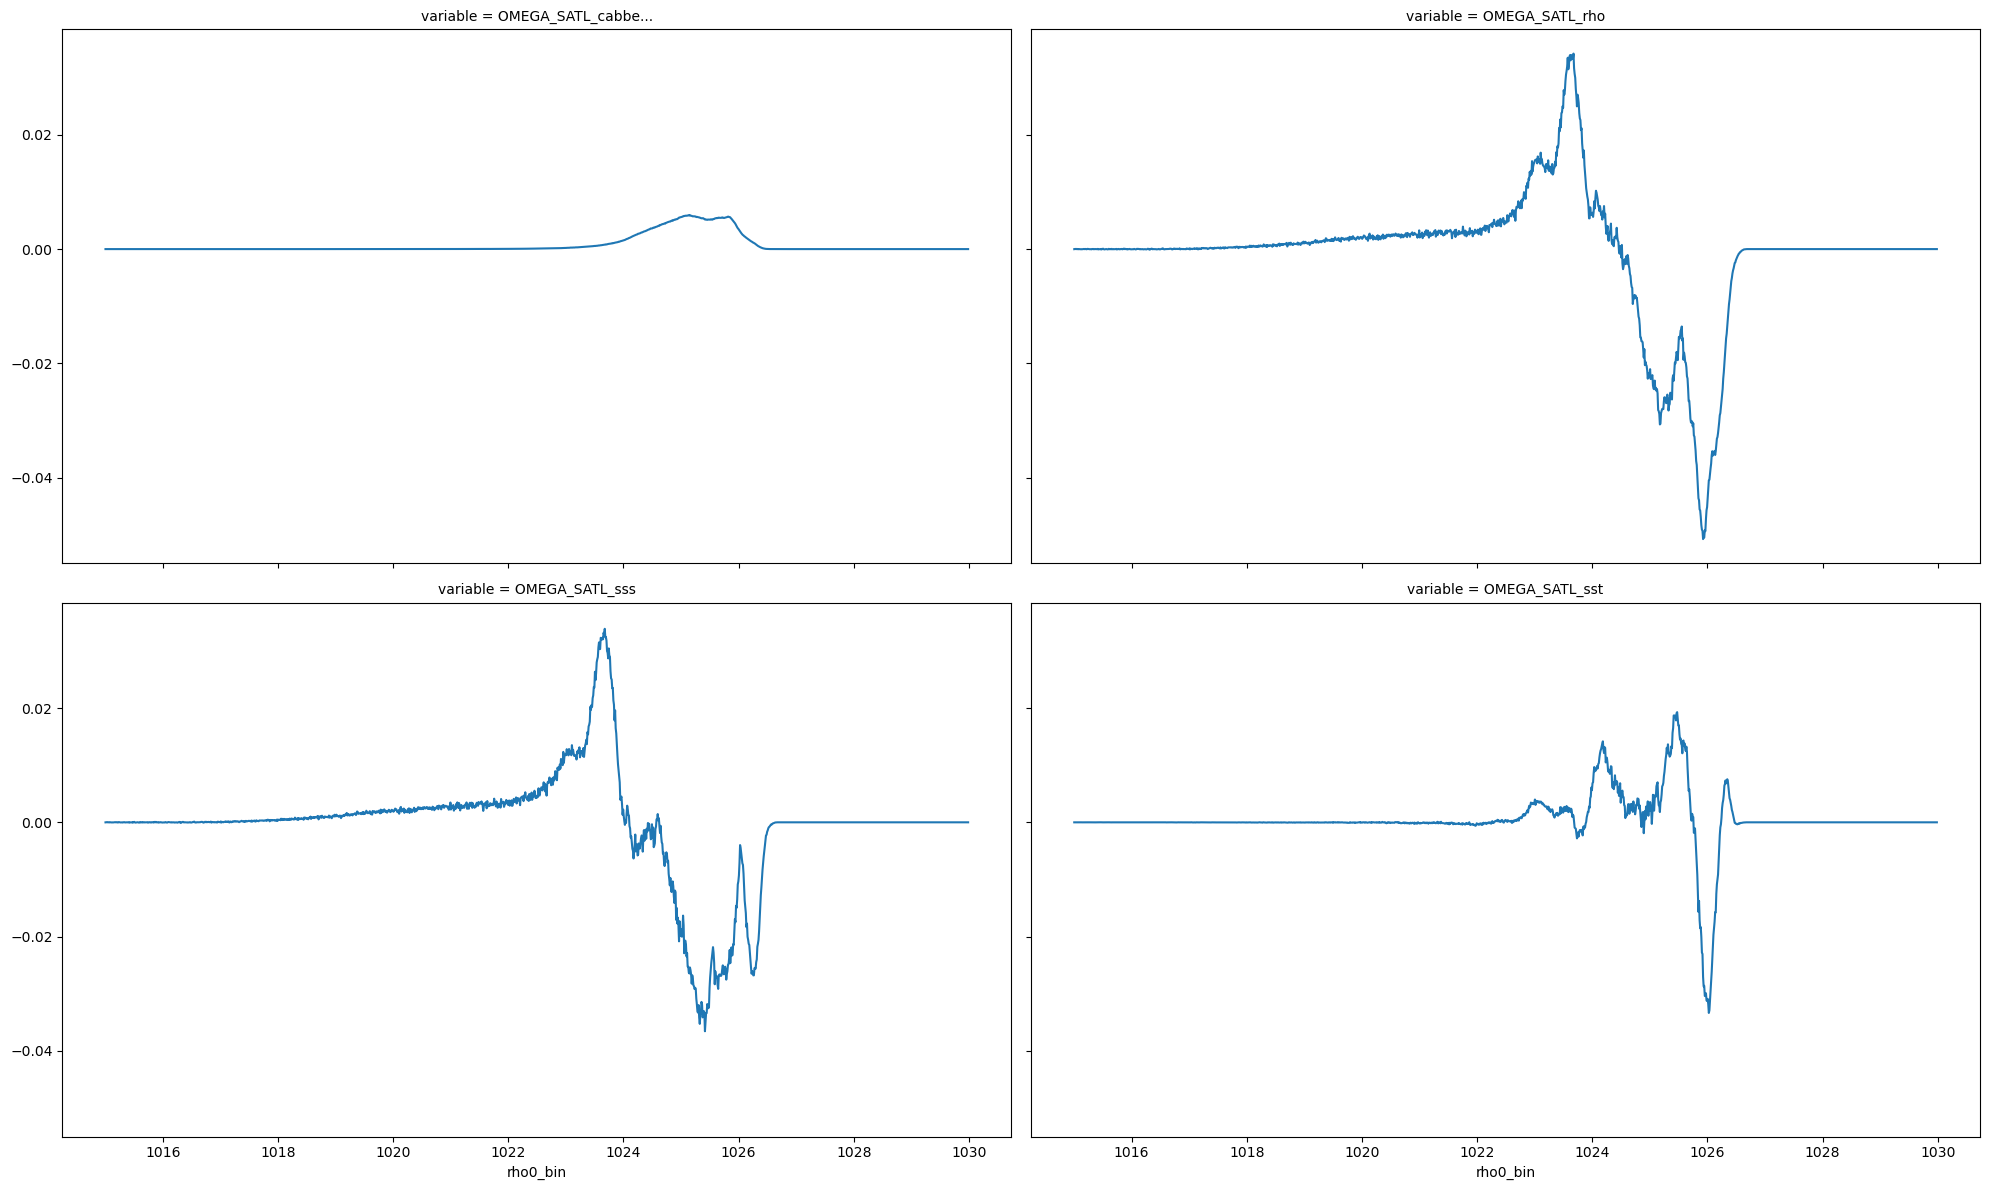

In [40]:
ann_mean1(satl)

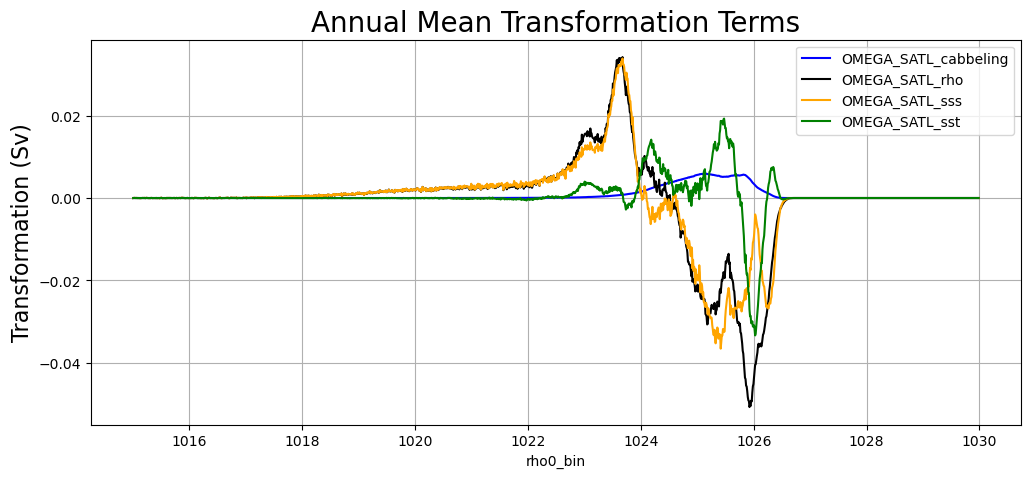

In [41]:
ann_mean2(satl)

## 1c) Annual-mean North PAC fig

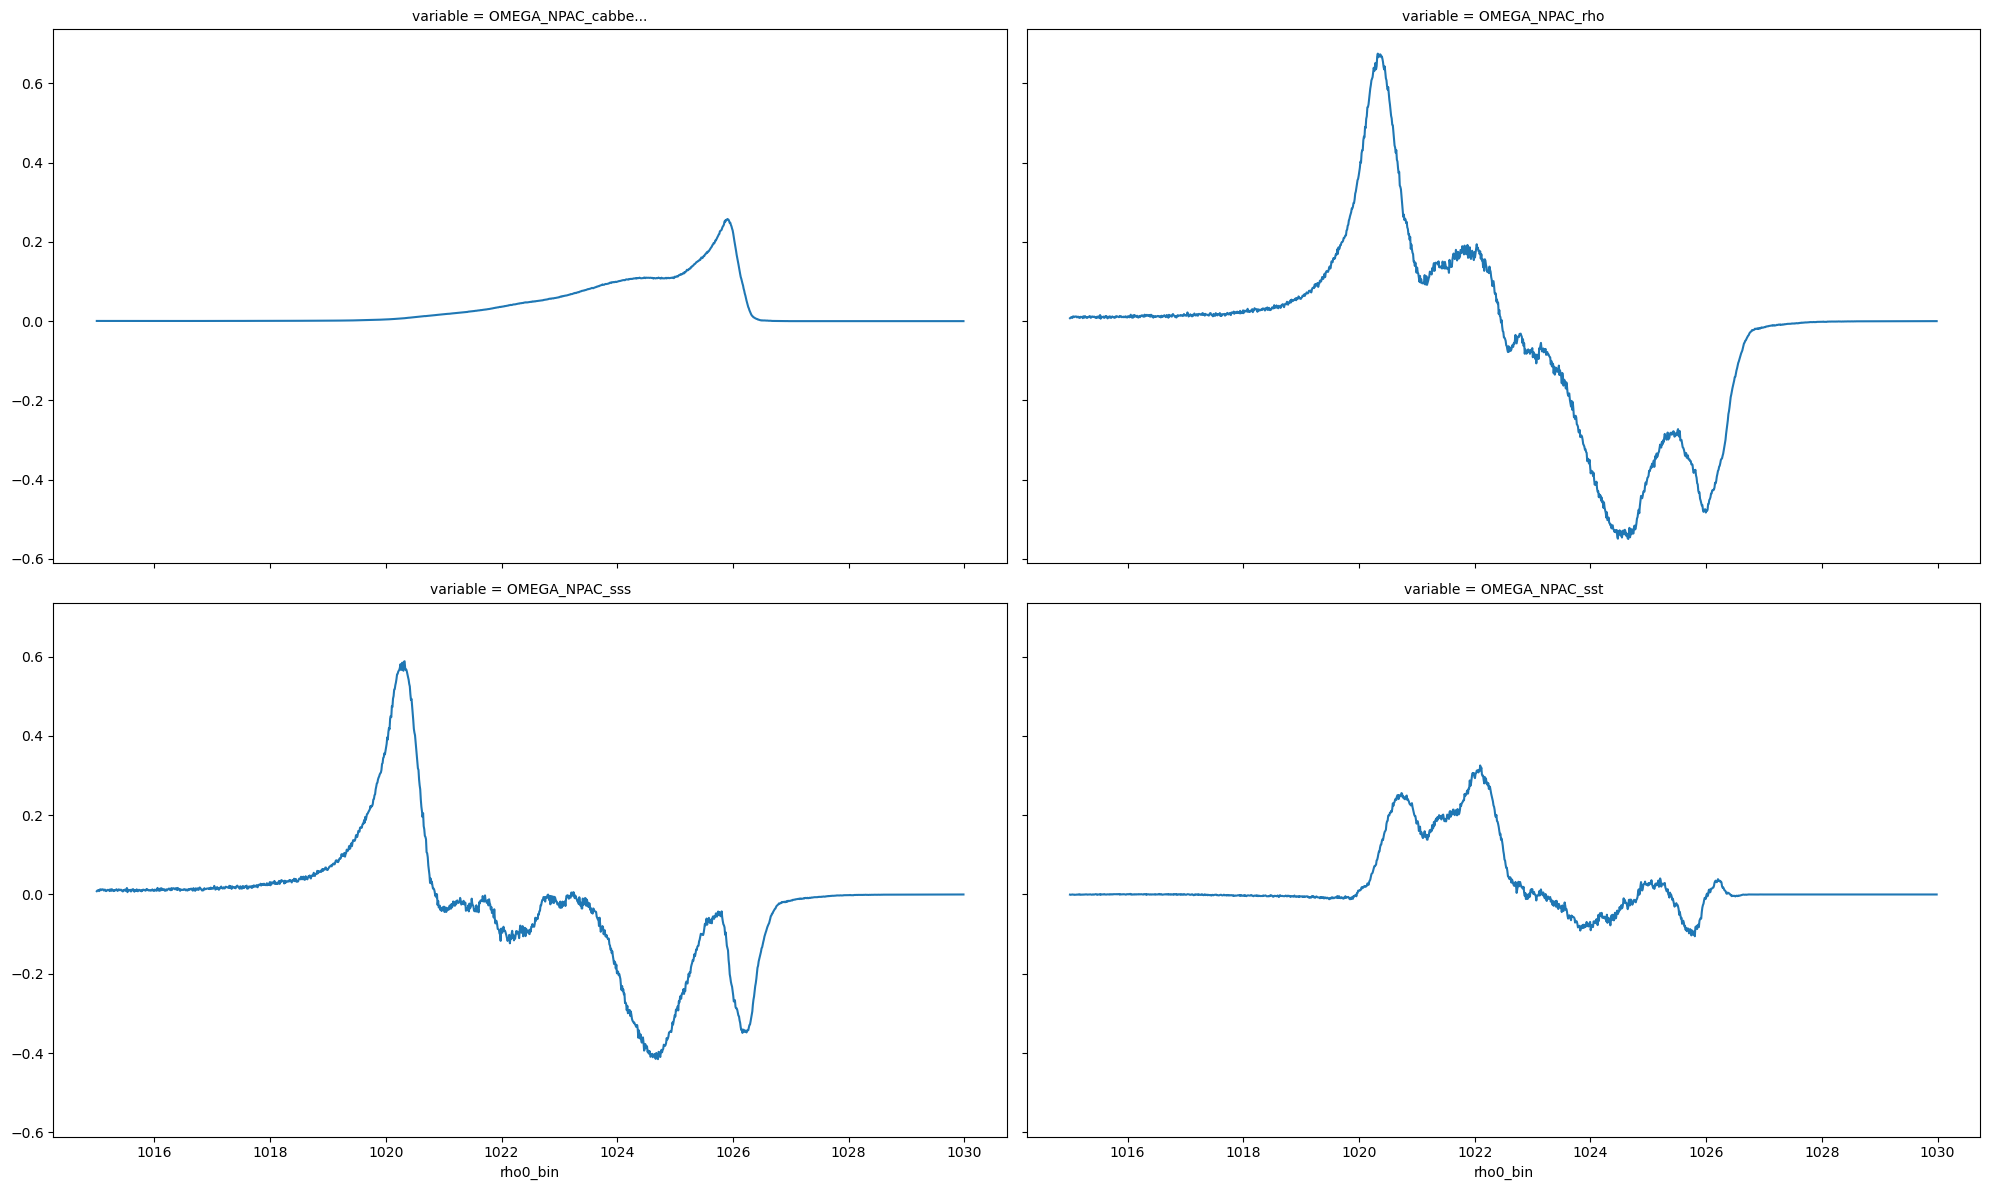

In [42]:
ann_mean1(npac)

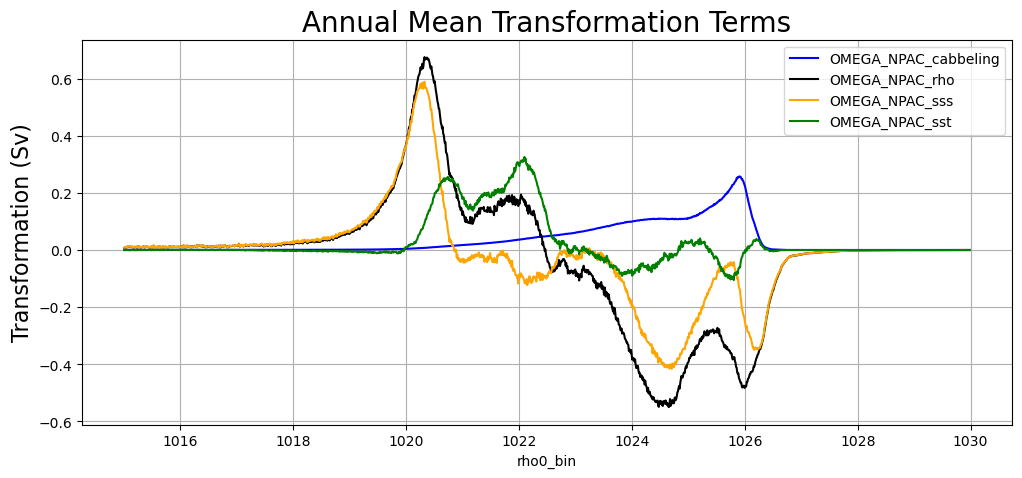

In [43]:
ann_mean2(npac)

## 1d) Annual-mean South PAC fig

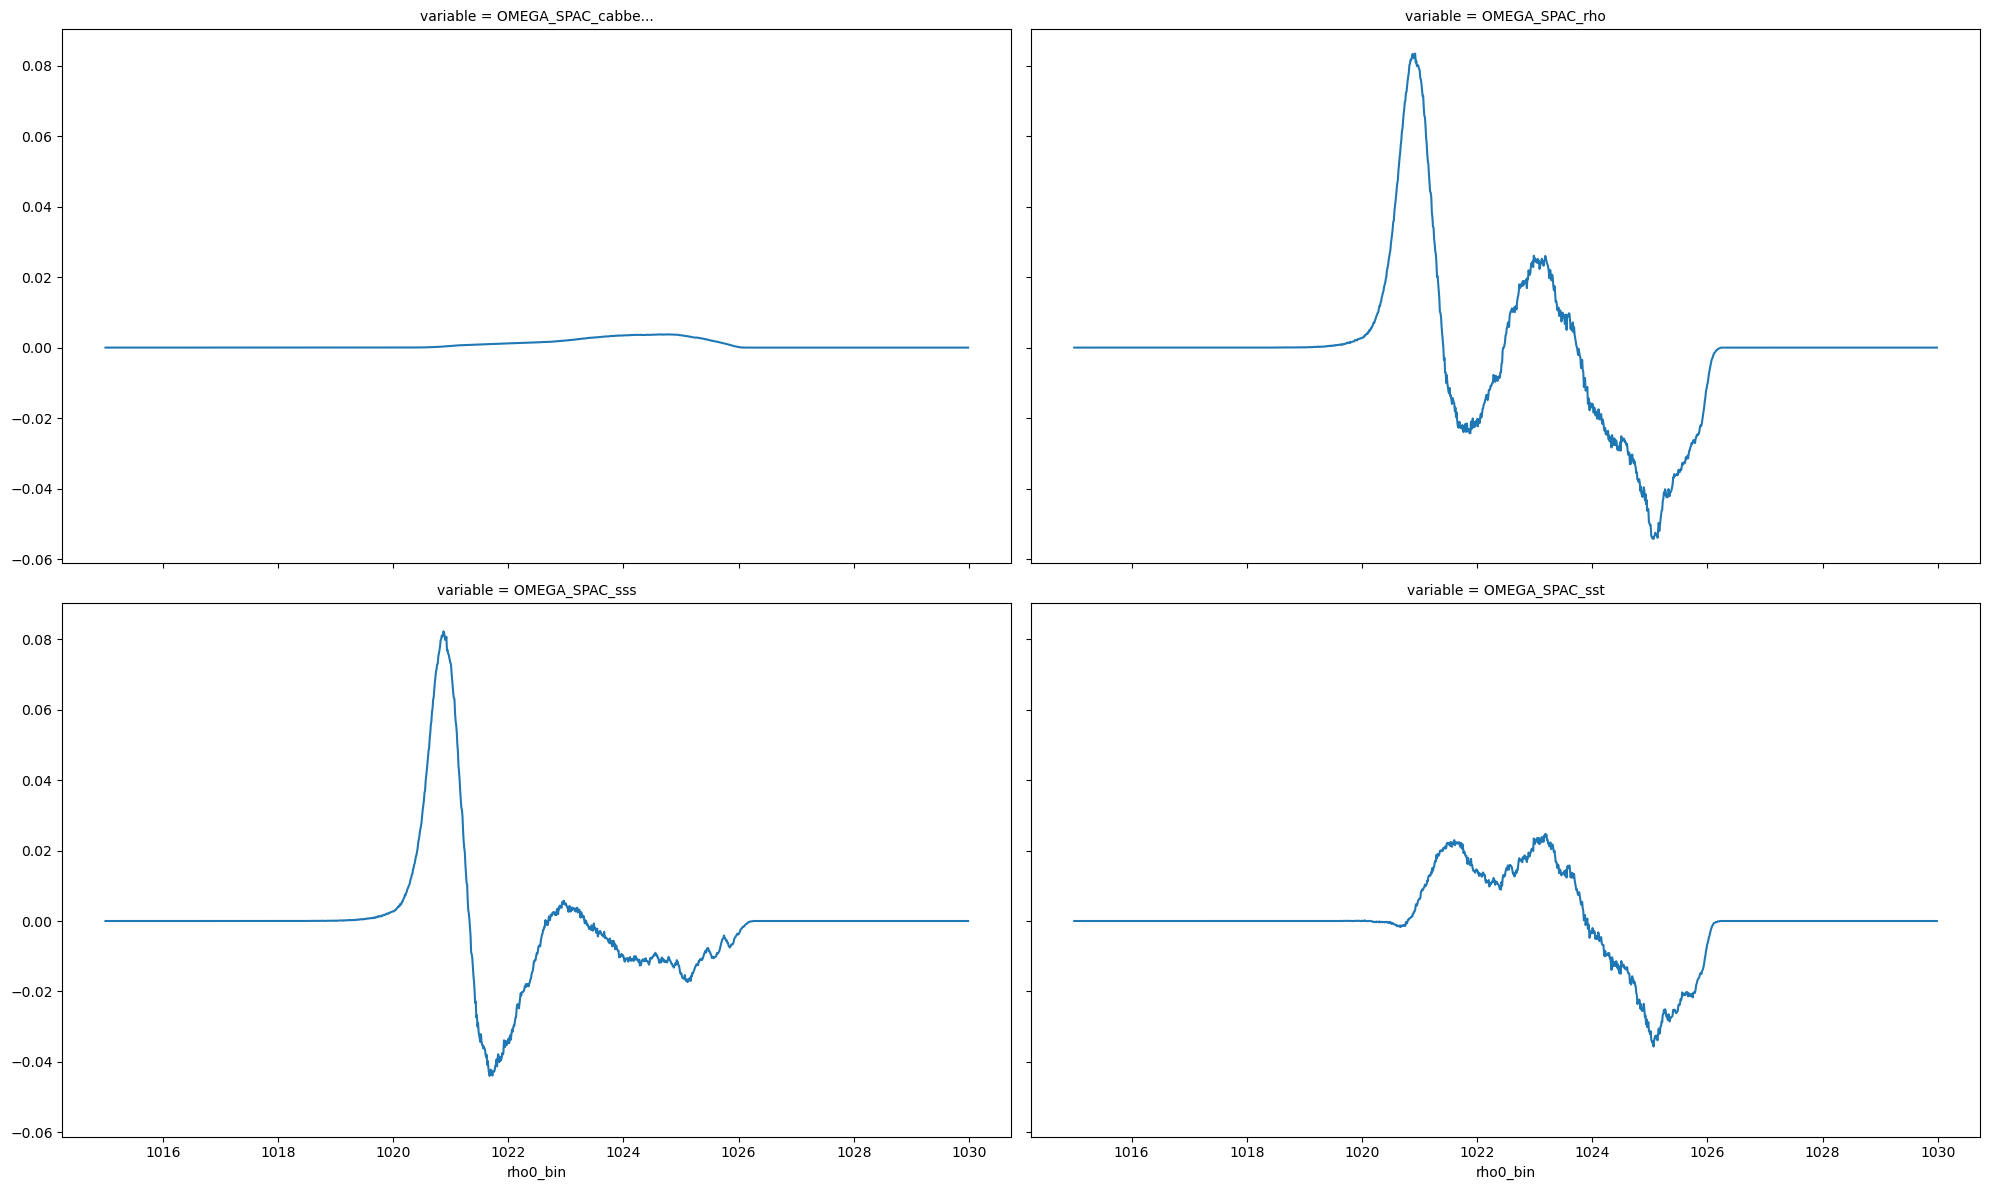

In [44]:
ann_mean1(spac)

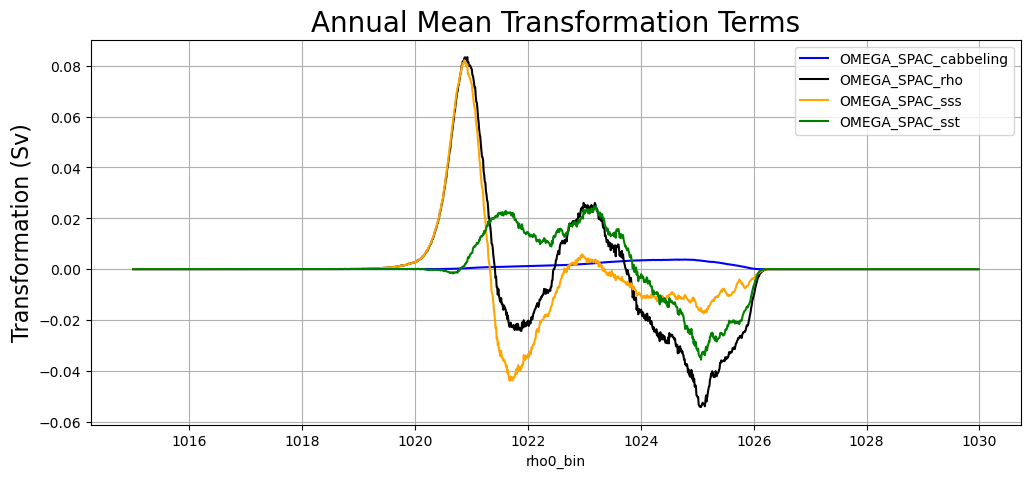

In [45]:
ann_mean2(spac)

## 1e) Annual-mean IND fig

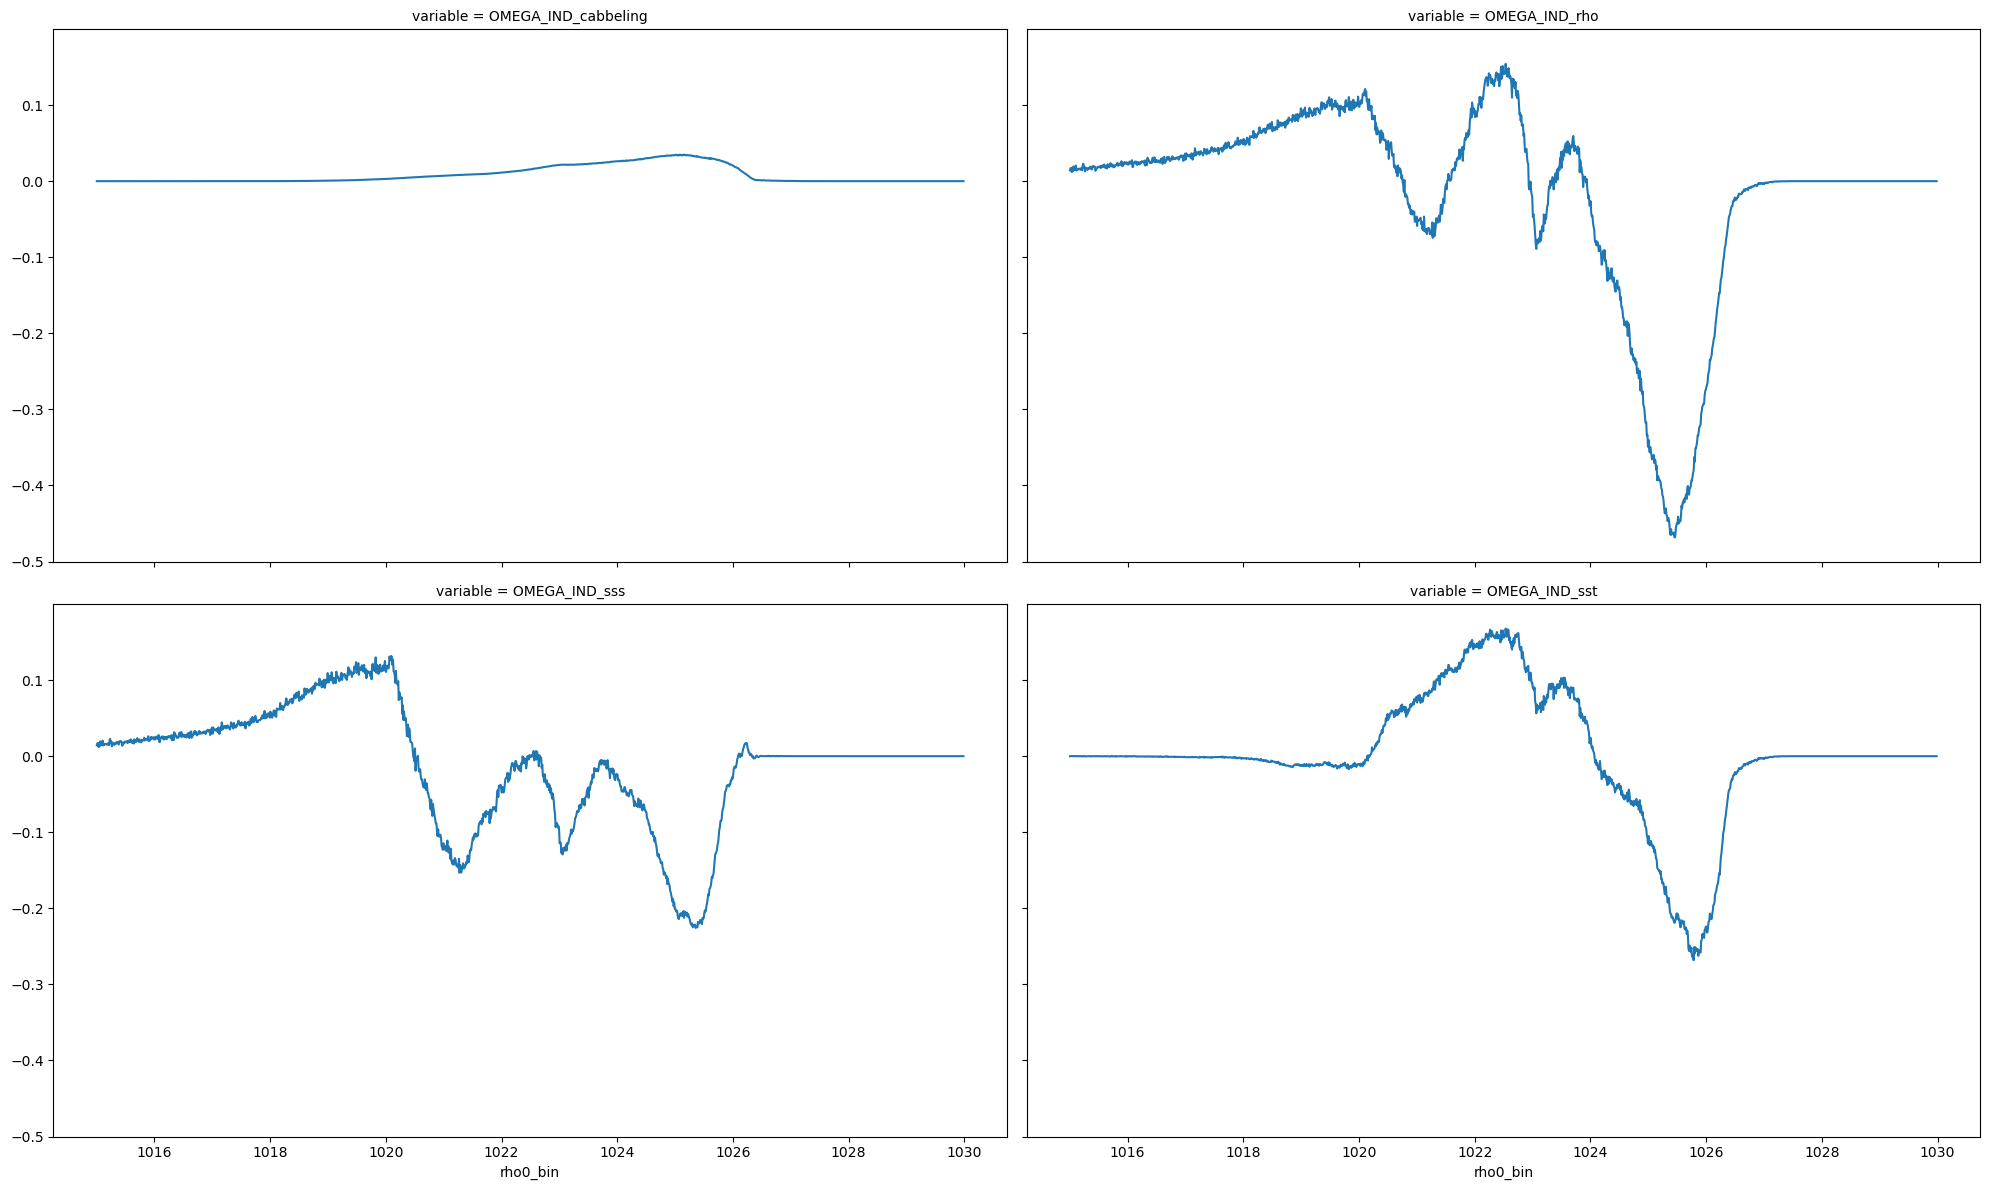

In [46]:
ann_mean1(ind)

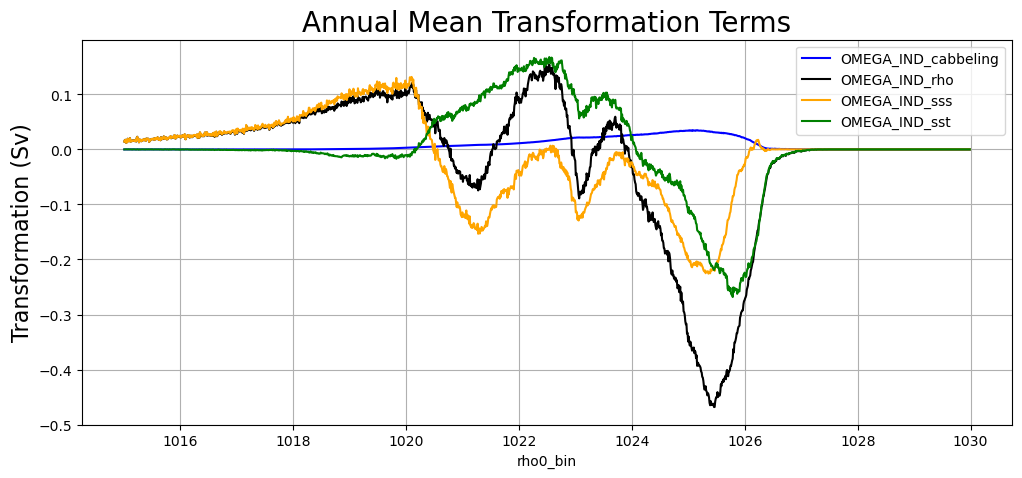

In [47]:
ann_mean2(ind)

## 1f) Annual-mean ARC fig

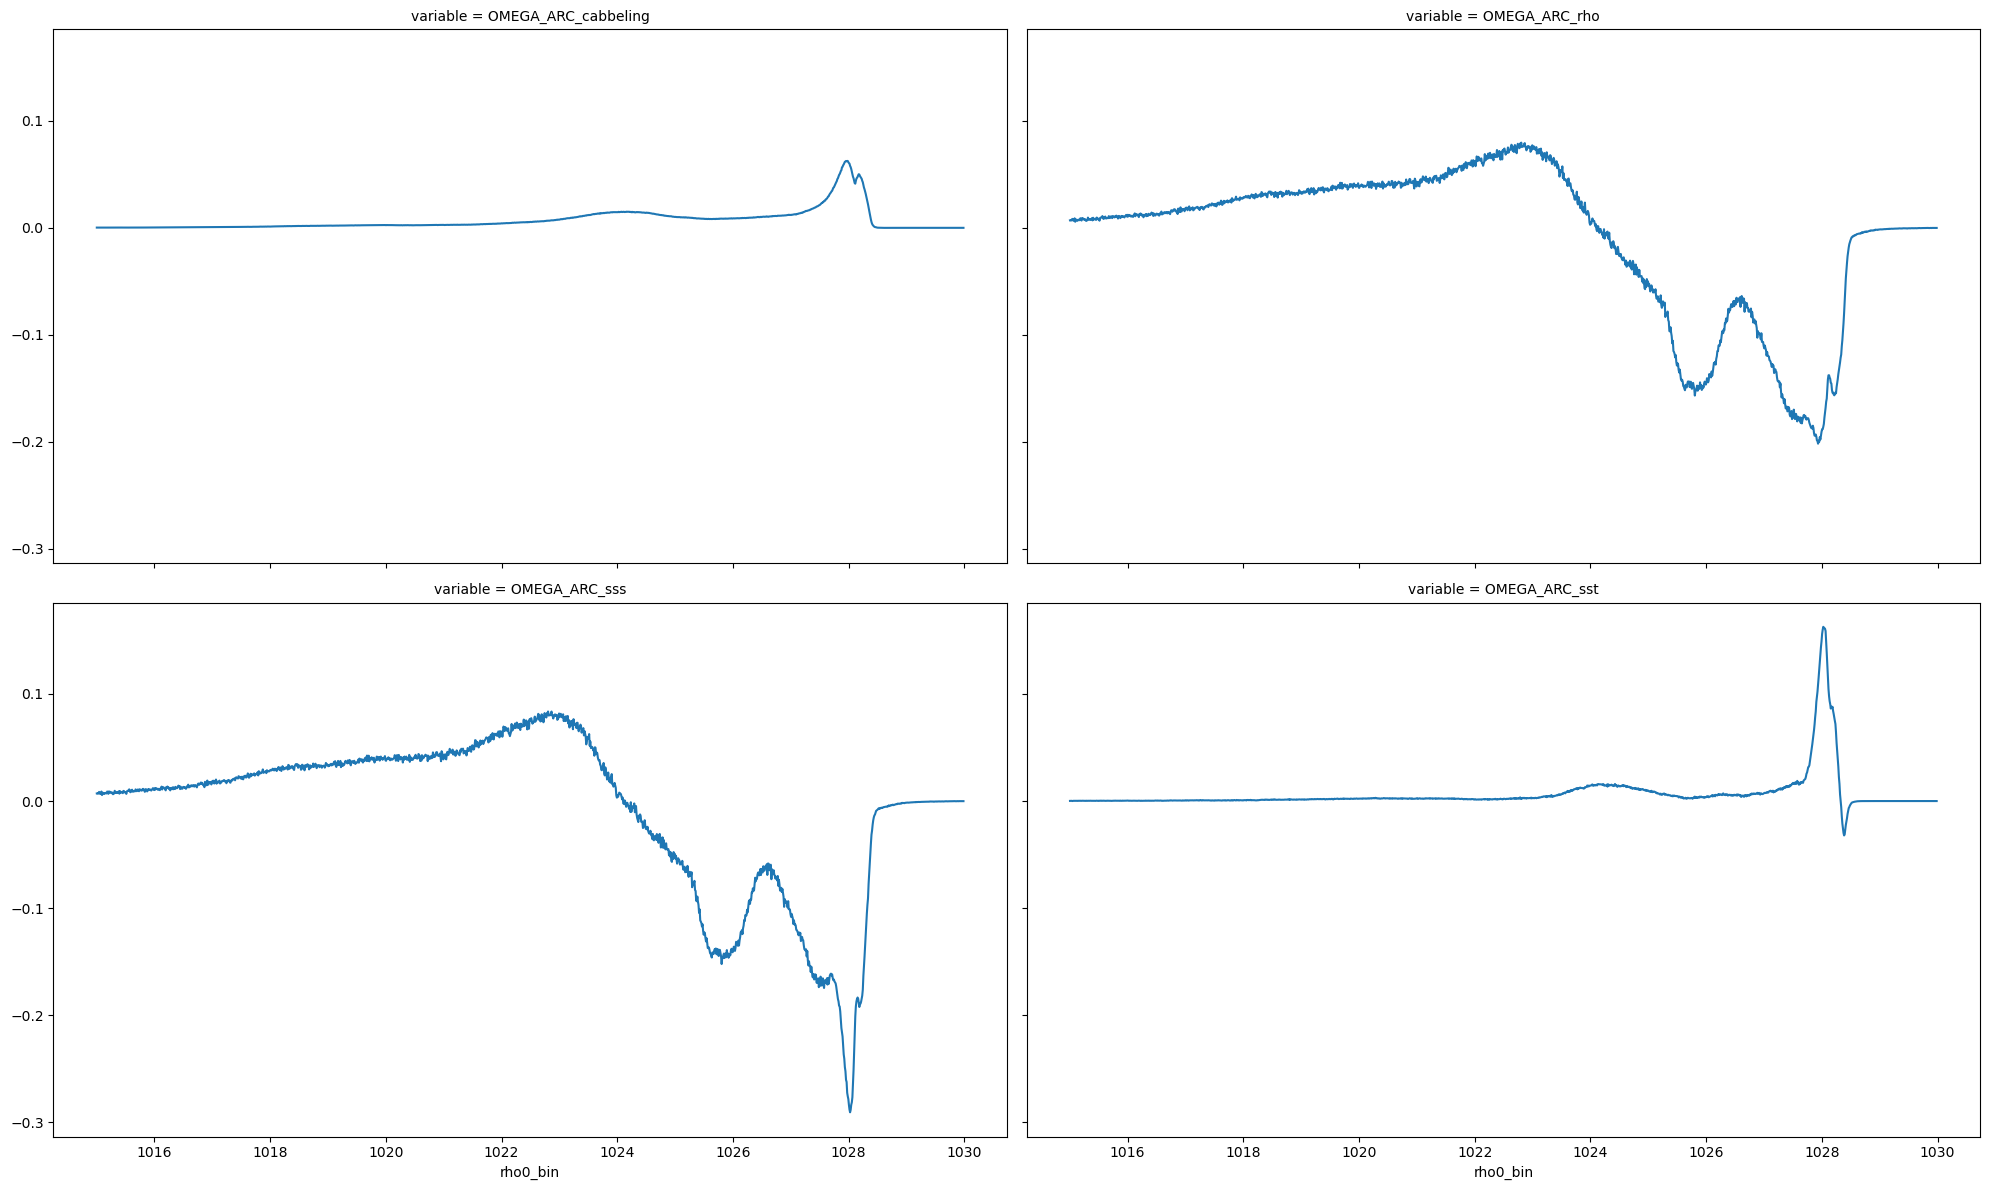

In [48]:
ann_mean1(arc)

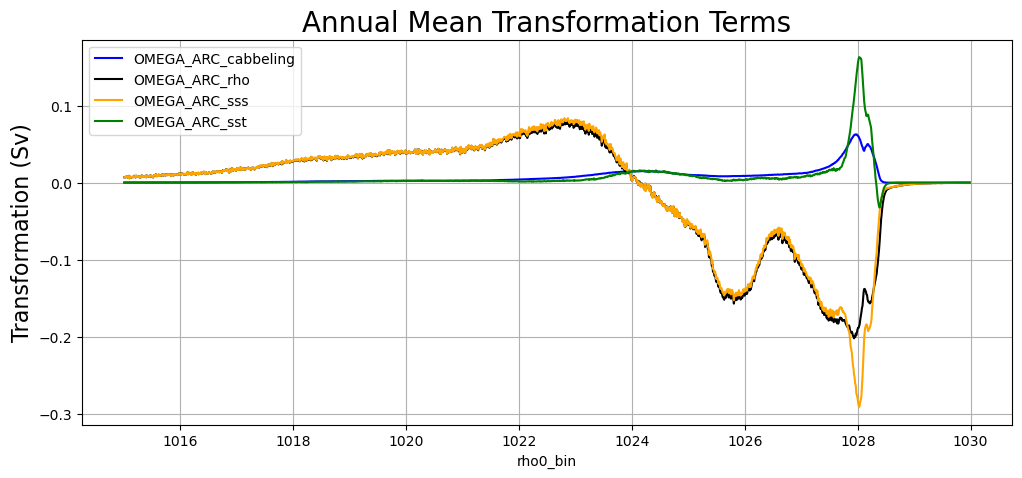

In [49]:
ann_mean2(arc)

## 1g) Annual-mean South fig

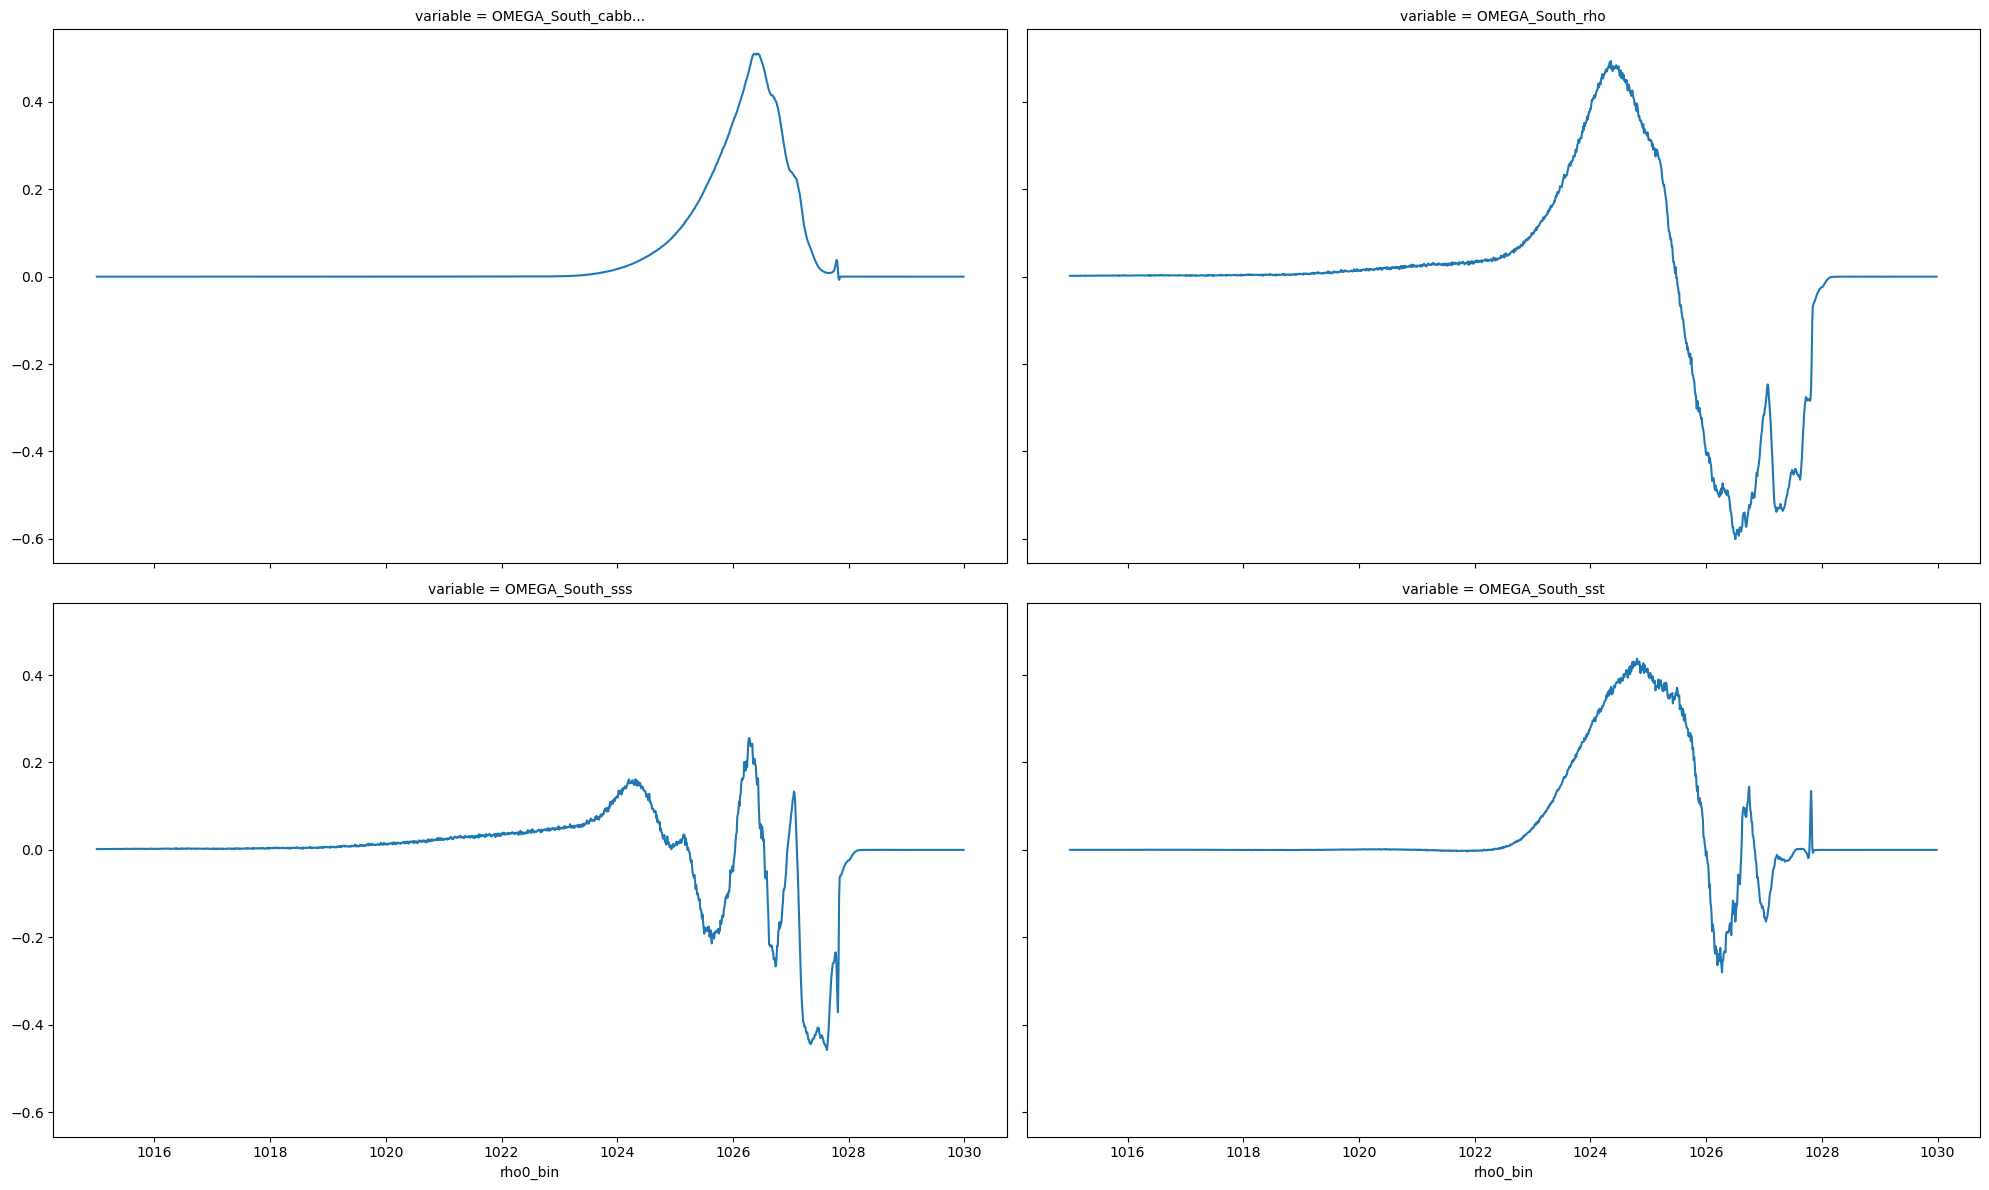

In [50]:
ann_mean1(south)

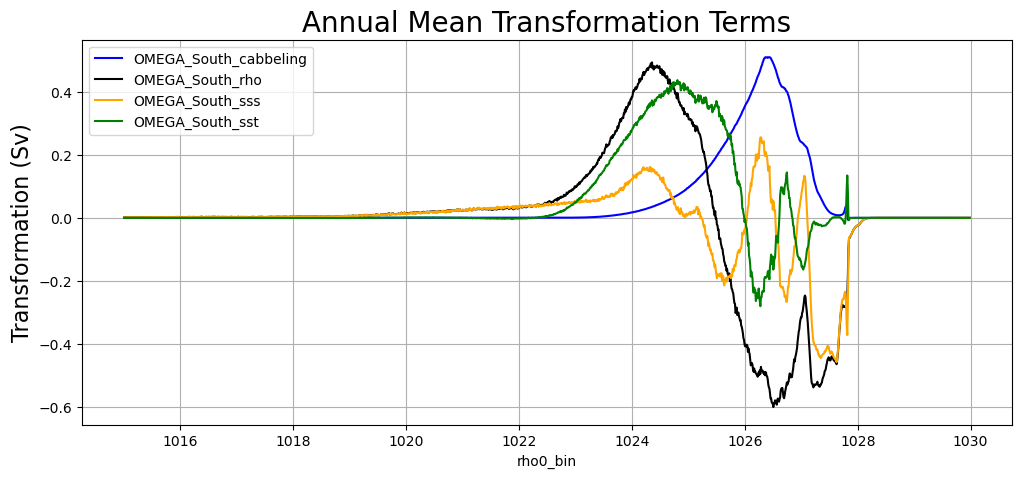

In [51]:
ann_mean2(south)

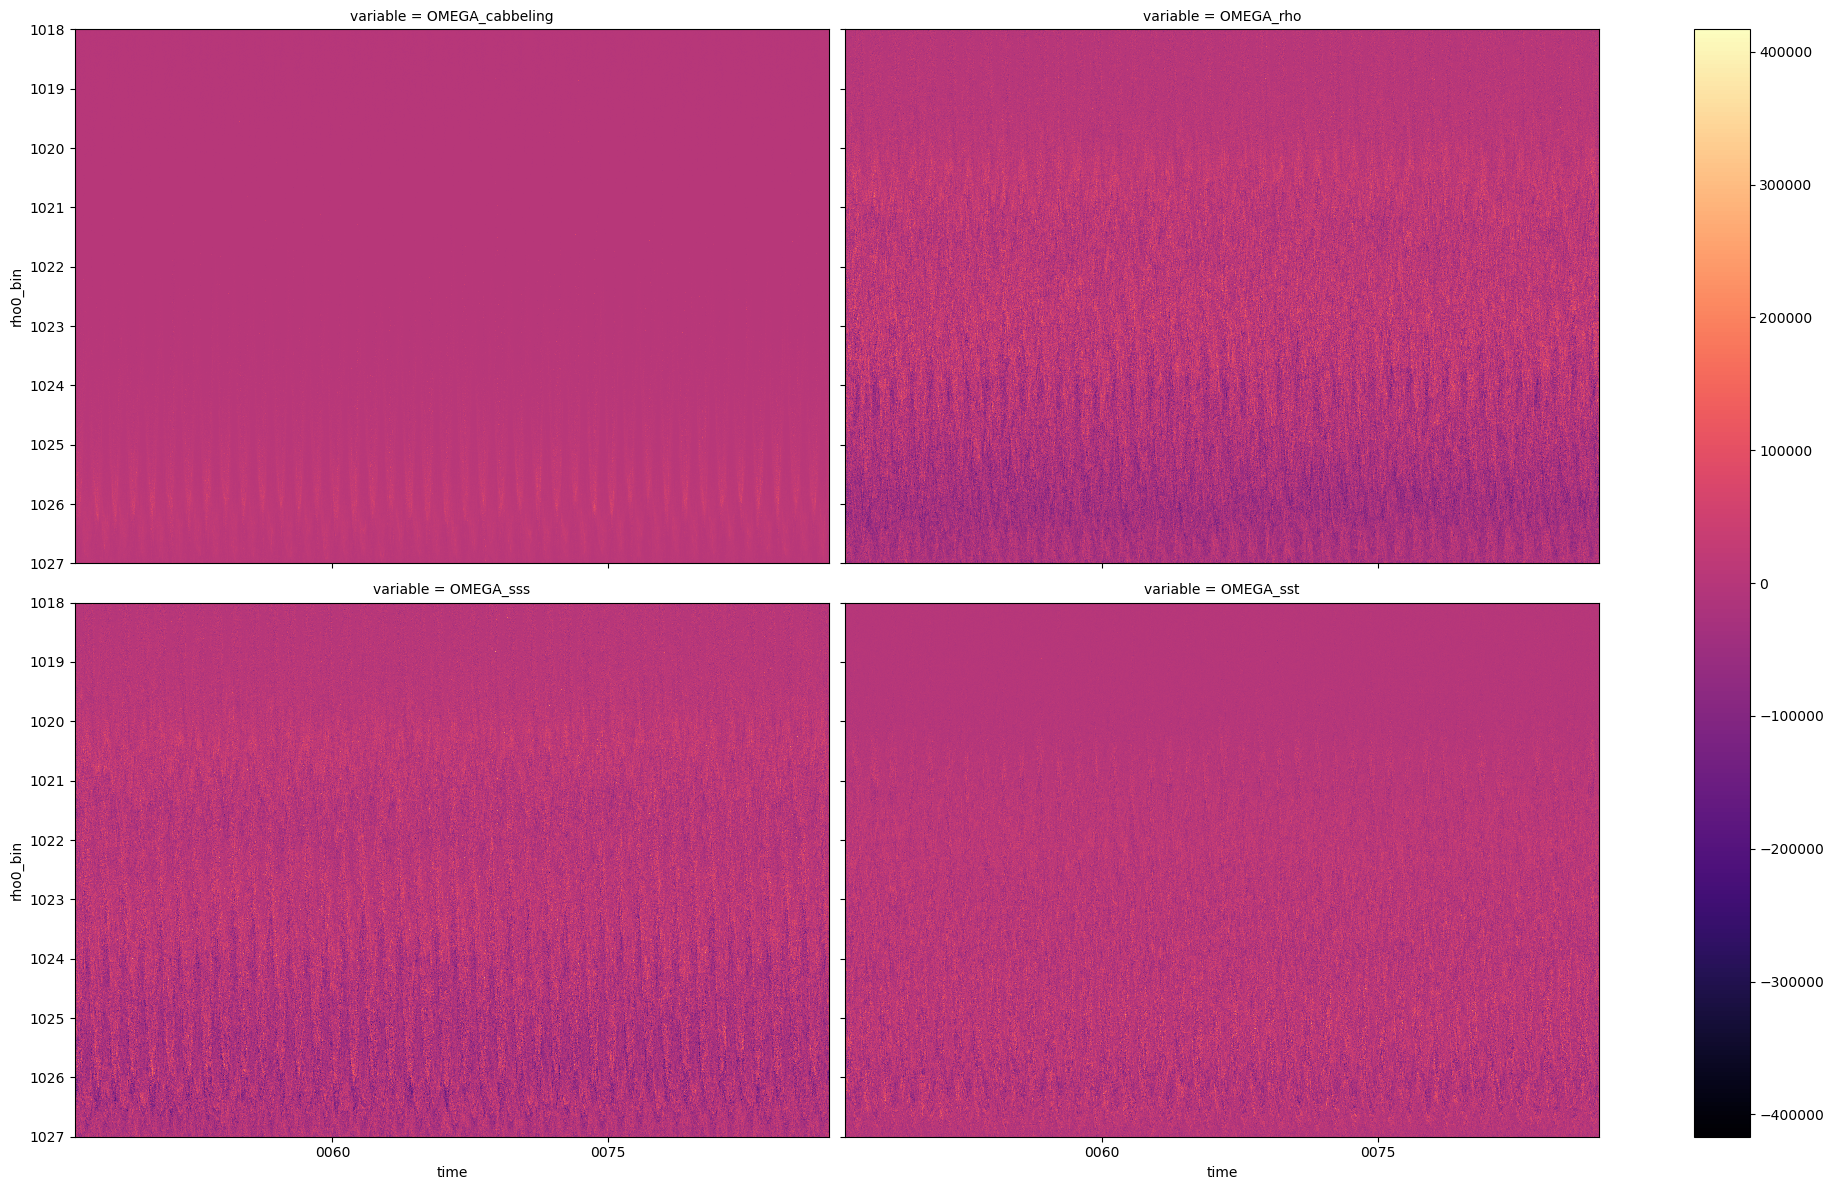

In [7]:
#instead of Sv (/1e6) it's m^2/s
(global_hist/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018);

## 2a) ATL timeseries fig 

In [8]:
#instead of Sv (/1e6) it's m^2/s
(atl/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018)
plt.title('Atlantic Ocean');

KeyboardInterrupt: 

## 2b) PAC timeseries fig 

In [ ]:
#instead of Sv (/1e6) it's m^2/s
(pac/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018)
plt.title('Pacific Ocean');

## 2c) IND timeseries fig 

In [ ]:
#instead of Sv (/1e6) it's m^2/s
(ind/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018)
plt.title('Indian Ocean');

## 2d) ARC timeseries fig 

In [ ]:
#instead of Sv (/1e6) it's m^2/s
(arc/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018)
plt.title('Arctic Ocean');

## 2e) South timeseries fig 

In [ ]:
#instead of Sv (/1e6) it's m^2/s
(south/1e4).to_array().T.plot(col='variable', col_wrap=2, figsize=(20, 12), 
                             cmap='magma')
plt.ylim(1027, 1018)
plt.title('Southern Ocean');

# 3) Global Monthly Climatology <a class='anchor' id='third-bullet'> </a>

In [52]:
import warnings
warnings.filterwarnings("ignore")

In [86]:
def clim(da):
    clim = (da/1e6).groupby('time.month').mean(dim='time')
    return clim

In [87]:
clim_global = clim(global_hist)
clim_natl = clim(natl)
clim_satl = clim(satl)
clim_npac = clim(npac)
clim_spac = clim(spac)
clim_ind = clim(ind)
clim_arc = clim(arc)
clim_south = clim(south)

In [60]:
def plotting_global(ds, scale):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

    levels = np.arange(-200, 200) + 10

    ds.OMEGA_rho.plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[0,0])
    axes[0,0].set_title(r'Density ($\rho_0$)')
    axes[0,0].set_ylim(1029, 1018)
    axes[0,0].grid()

    ds.OMEGA_cabbeling.plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[0,1])
    axes[0,1].set_title('Cabbeling')
    axes[0,1].set_ylim(1029, 1018)
    axes[0,1].grid()

    ds.OMEGA_sst.plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[1,0])
    axes[1,0].set_title('SST')
    axes[1,0].set_ylim(1029, 1018)
    axes[1,0].grid()

    ds.OMEGA_sss.plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[1,1])
    axes[1,1].set_title('SSS')
    axes[1,1].set_ylim(1029, 1018)
    axes[1,1].grid()

    plt.suptitle(f'{scale} transformation due to ...', fontsize=20, y=1)
    plt.tight_layout();

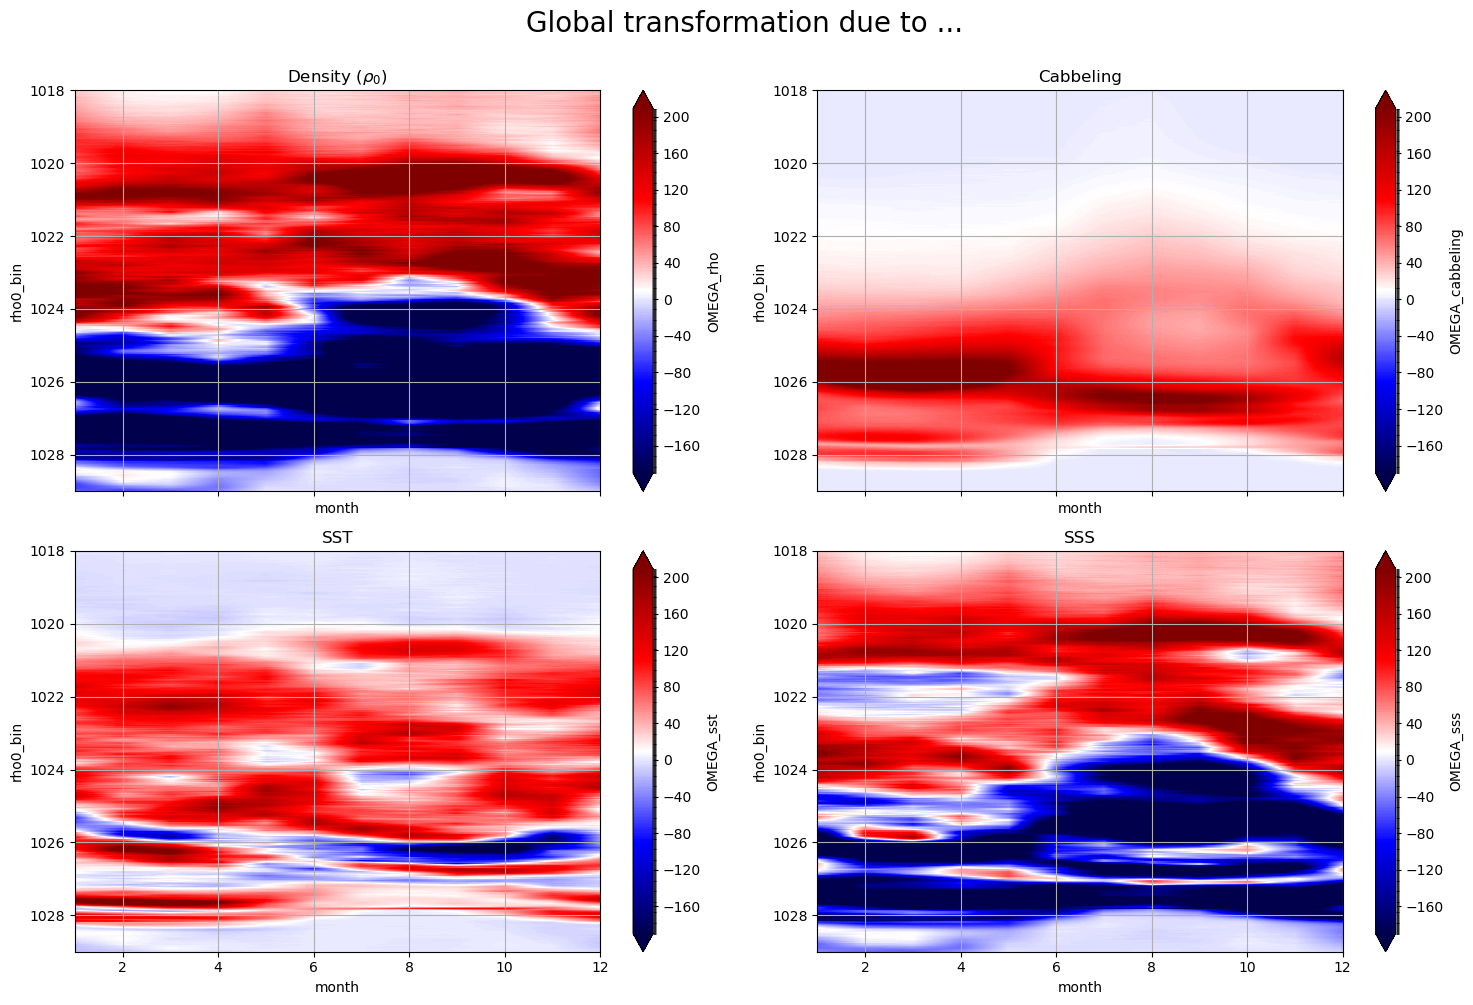

In [61]:
plotting_global(clim_global, 'Global')

## 3a) ATL monthly climatology

In [80]:
def plotting(ds, prefix, scale):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

    levels = np.arange(-1.5, 1.5) + .1

    ds[f'OMEGA_{prefix}rho'].plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[0,0])
    axes[0,0].set_title(r'Density ($\rho_0$)')
    axes[0,0].set_ylim(1029, 1018)
    axes[0,0].grid()

    ds[f'OMEGA_{prefix}cabbeling'].plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[0,1])
    axes[0,1].set_title('Cabbeling')
    axes[0,1].set_ylim(1029, 1018)
    axes[0,1].grid()

    ds[f'OMEGA_{prefix}sst'].plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[1,0])
    axes[1,0].set_title('SST')
    axes[1,0].set_ylim(1029, 1018)
    axes[1,0].grid()

    ds[f'OMEGA_{prefix}sss'].plot.contourf(x='month', cmap='seismic', levels=levels, extend='both', ax=axes[1,1])
    axes[1,1].set_title('SSS')
    axes[1,1].set_ylim(1029, 1018)
    axes[1,1].grid()

    plt.suptitle(f'{scale} transformation due to ...', fontsize=20, y=1)
    plt.tight_layout();

In [74]:
clim_natl.OMEGA_NATL_rho.max().values

array(1.0992445)

In [84]:
clim_natl.OMEGA_NATL_rho.min().values

array(-1.45978658)

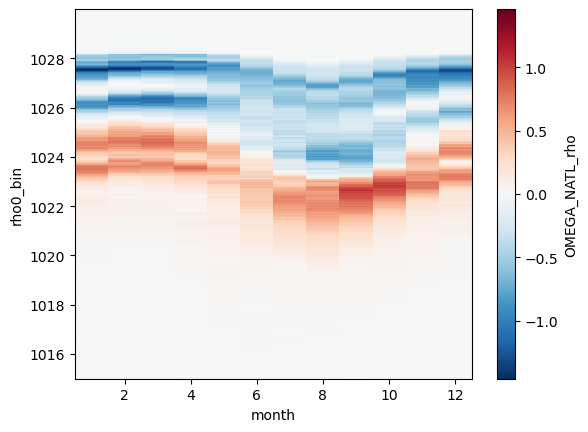

In [89]:
clim_natl.OMEGA_NATL_rho.T.plot()

In [ ]:
clim_natl.OMEGA_NATL_rho.plot.contourf(x='month', levels=(np.arange(-1.5, 1.5) + 0.1), extend='both')

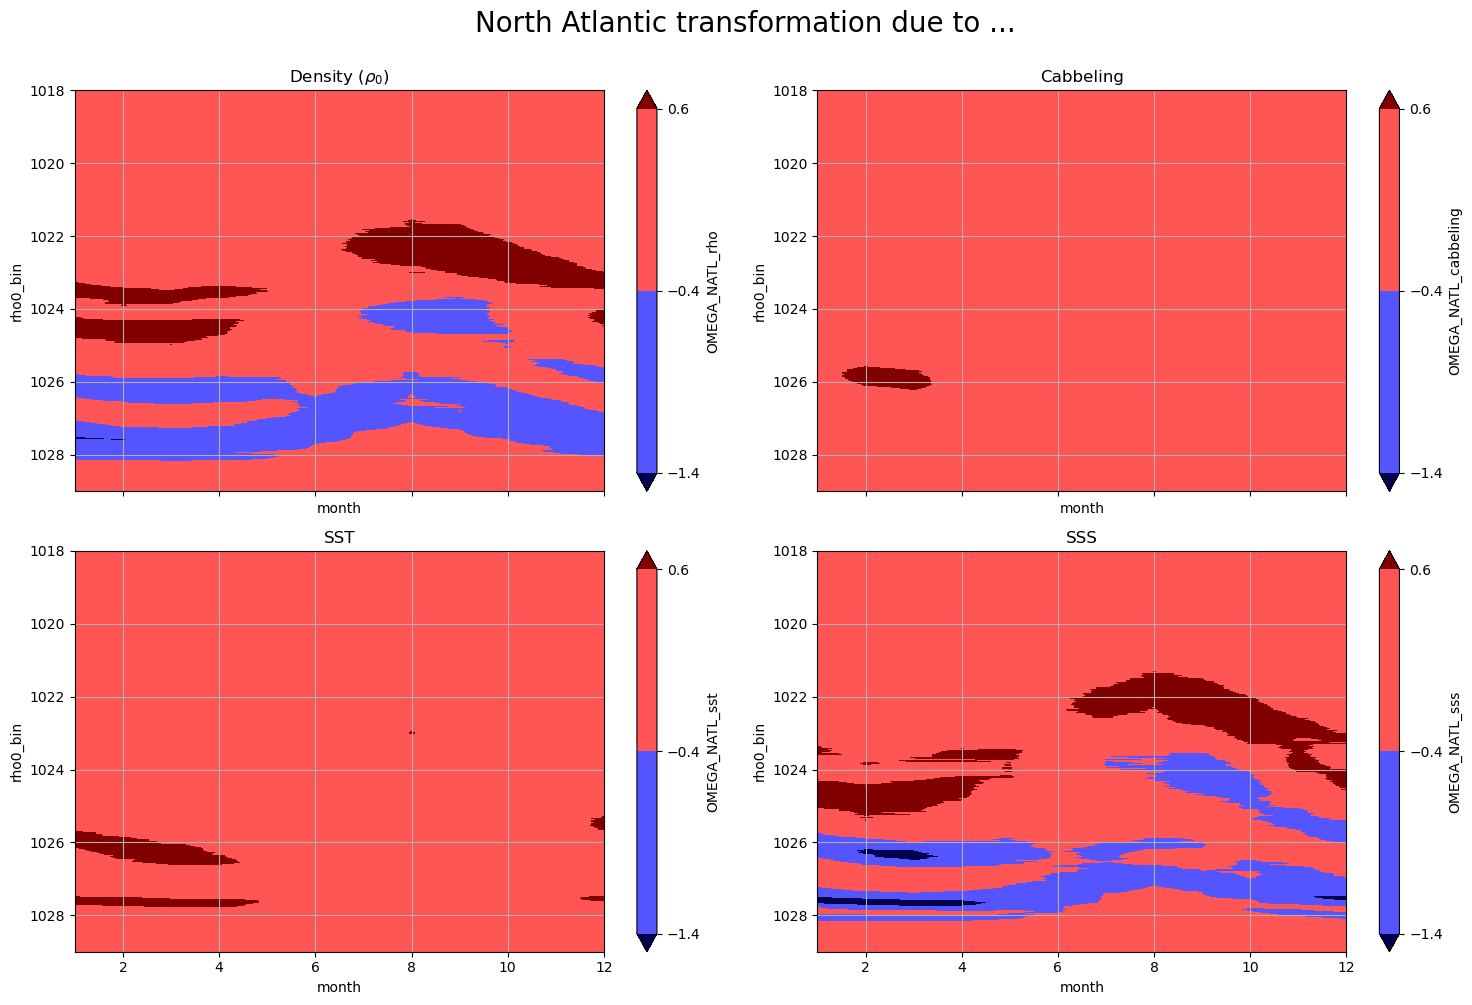

In [81]:
plotting(clim_natl, 'NATL_', 'North Atlantic')

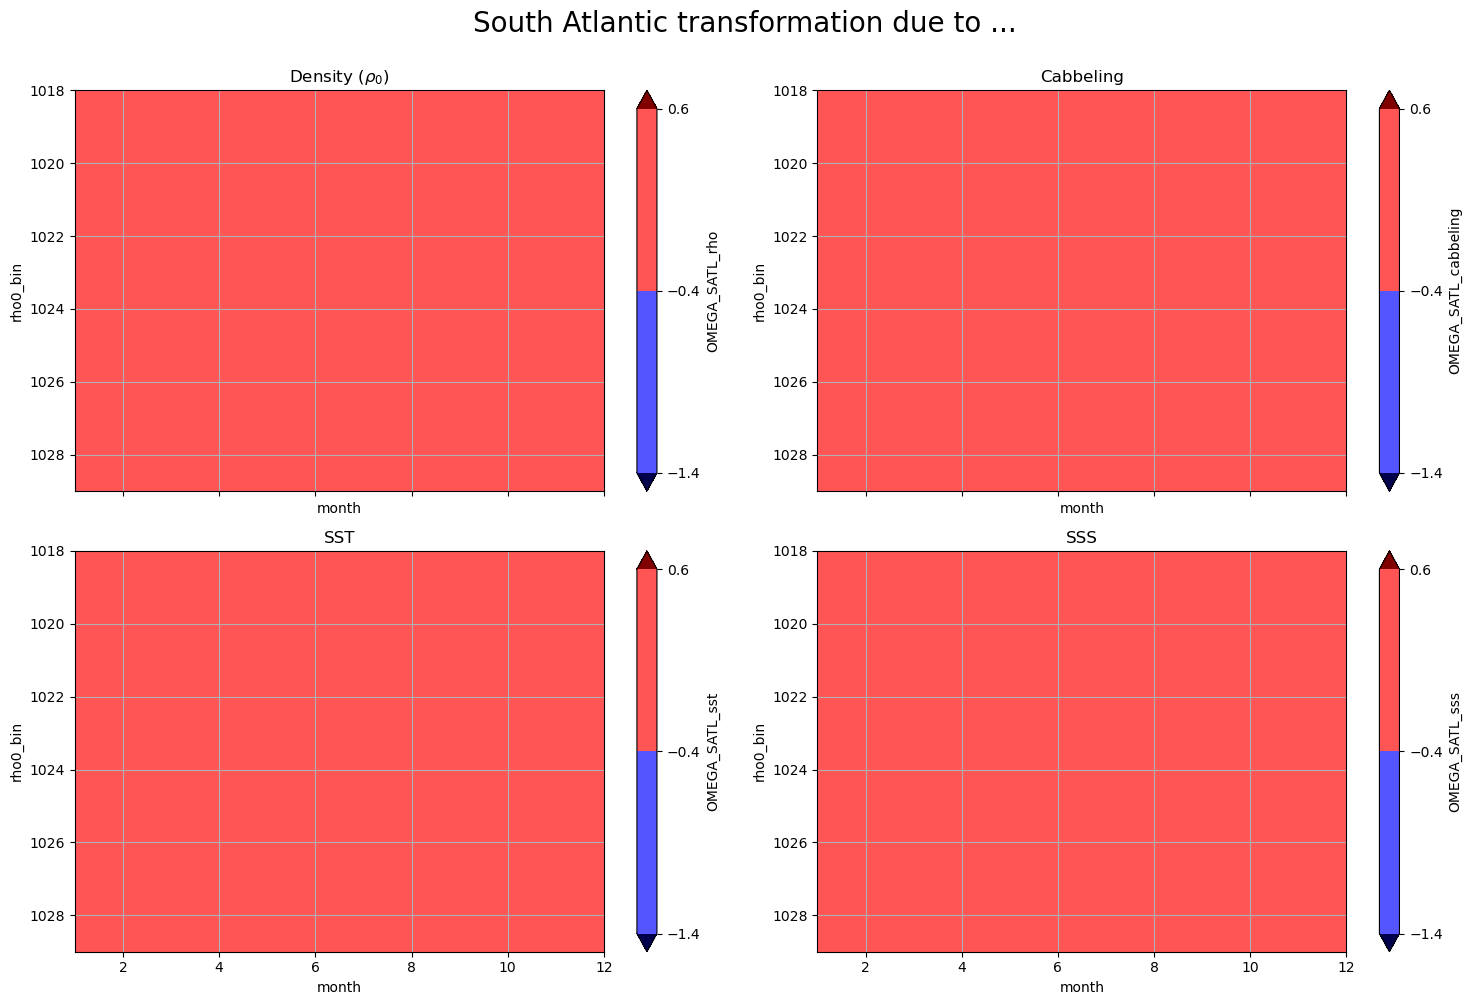

In [82]:
plotting(clim_satl, 'SATL_', 'South Atlantic')

## 3b) PAC monthly climatology

In [83]:
plotting(clim_pac, 'NPAC_', 'North Pacific')

NameError: name 'clim_pac' is not defined

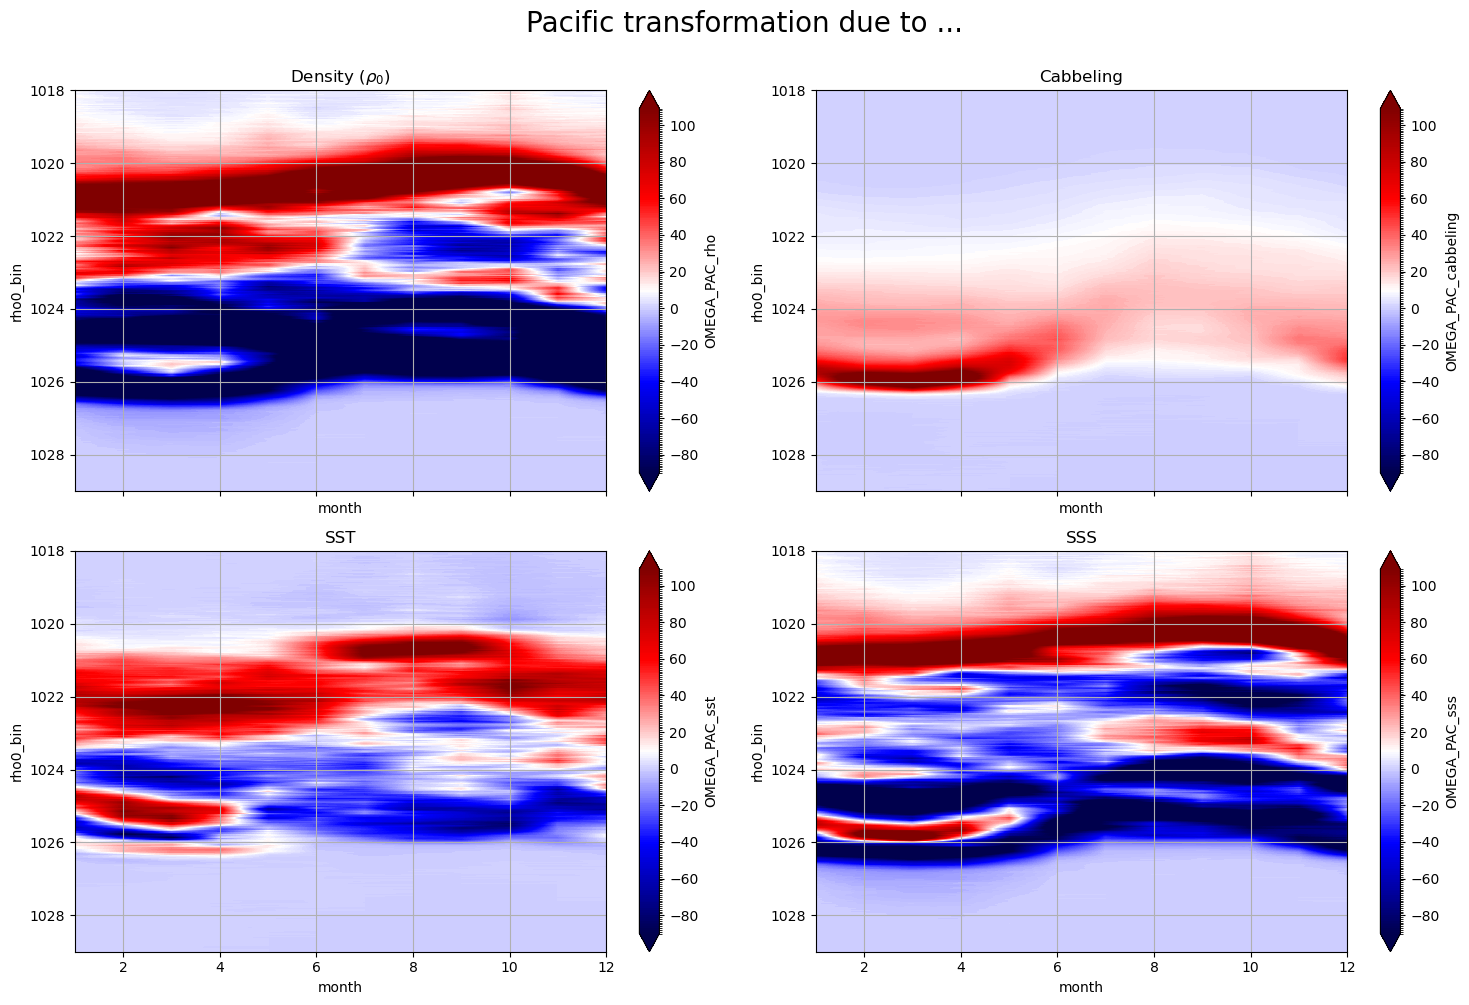

In [66]:
plotting(clim_pac, 'NPAC_', 'North Pacific')

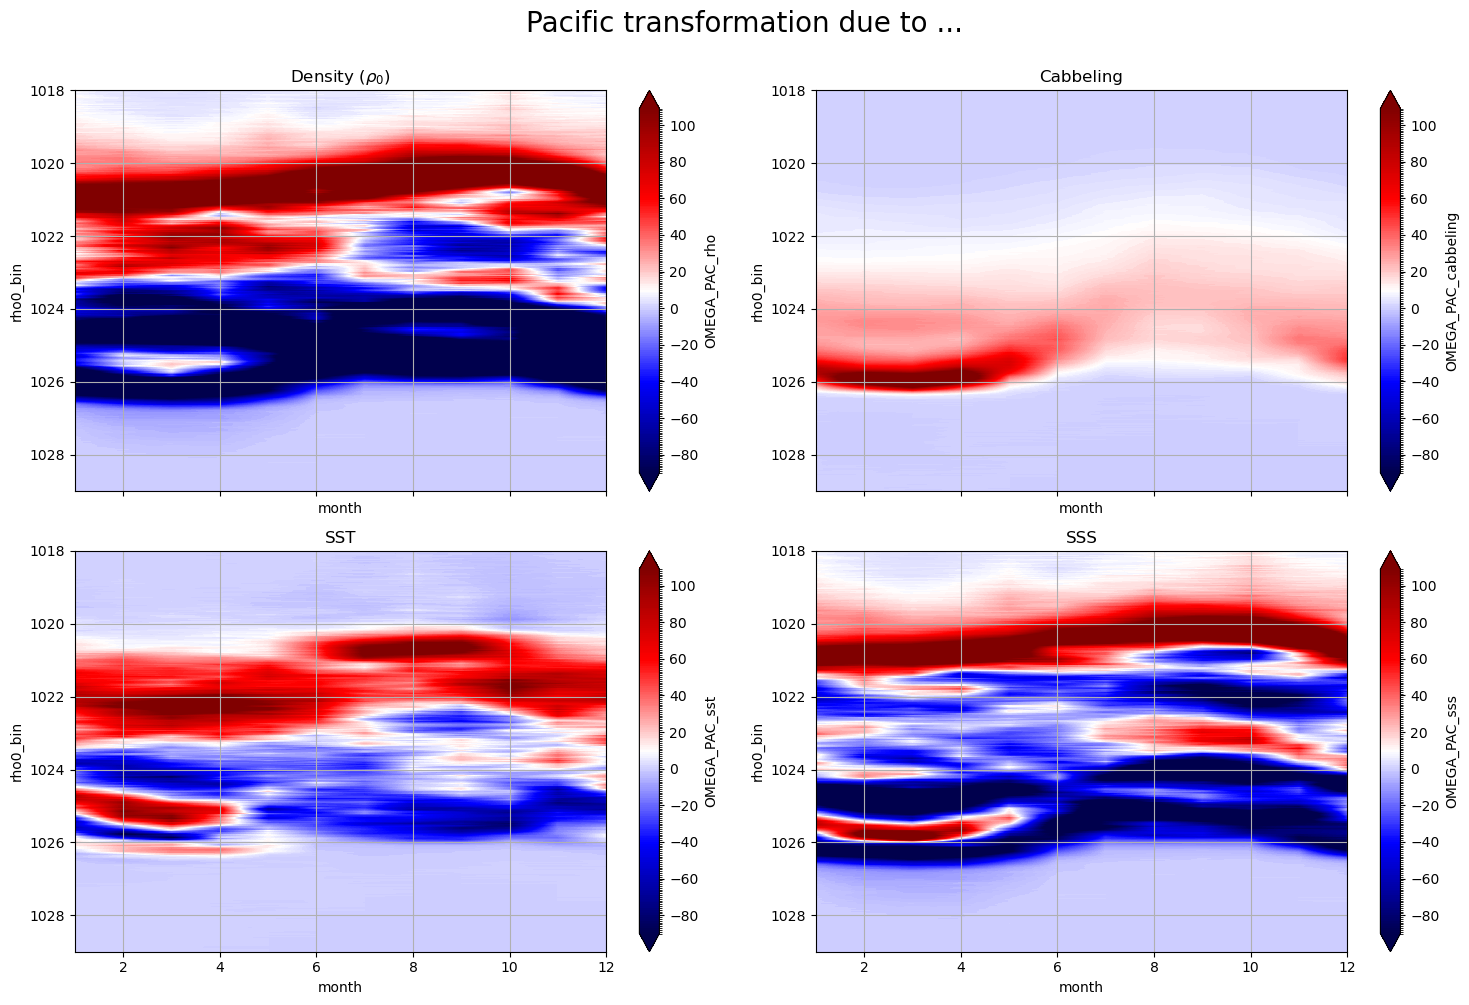

In [66]:
plotting(clim_pac, 'SPAC_', 'South Pacific')

## 3c) IND monthly climatology

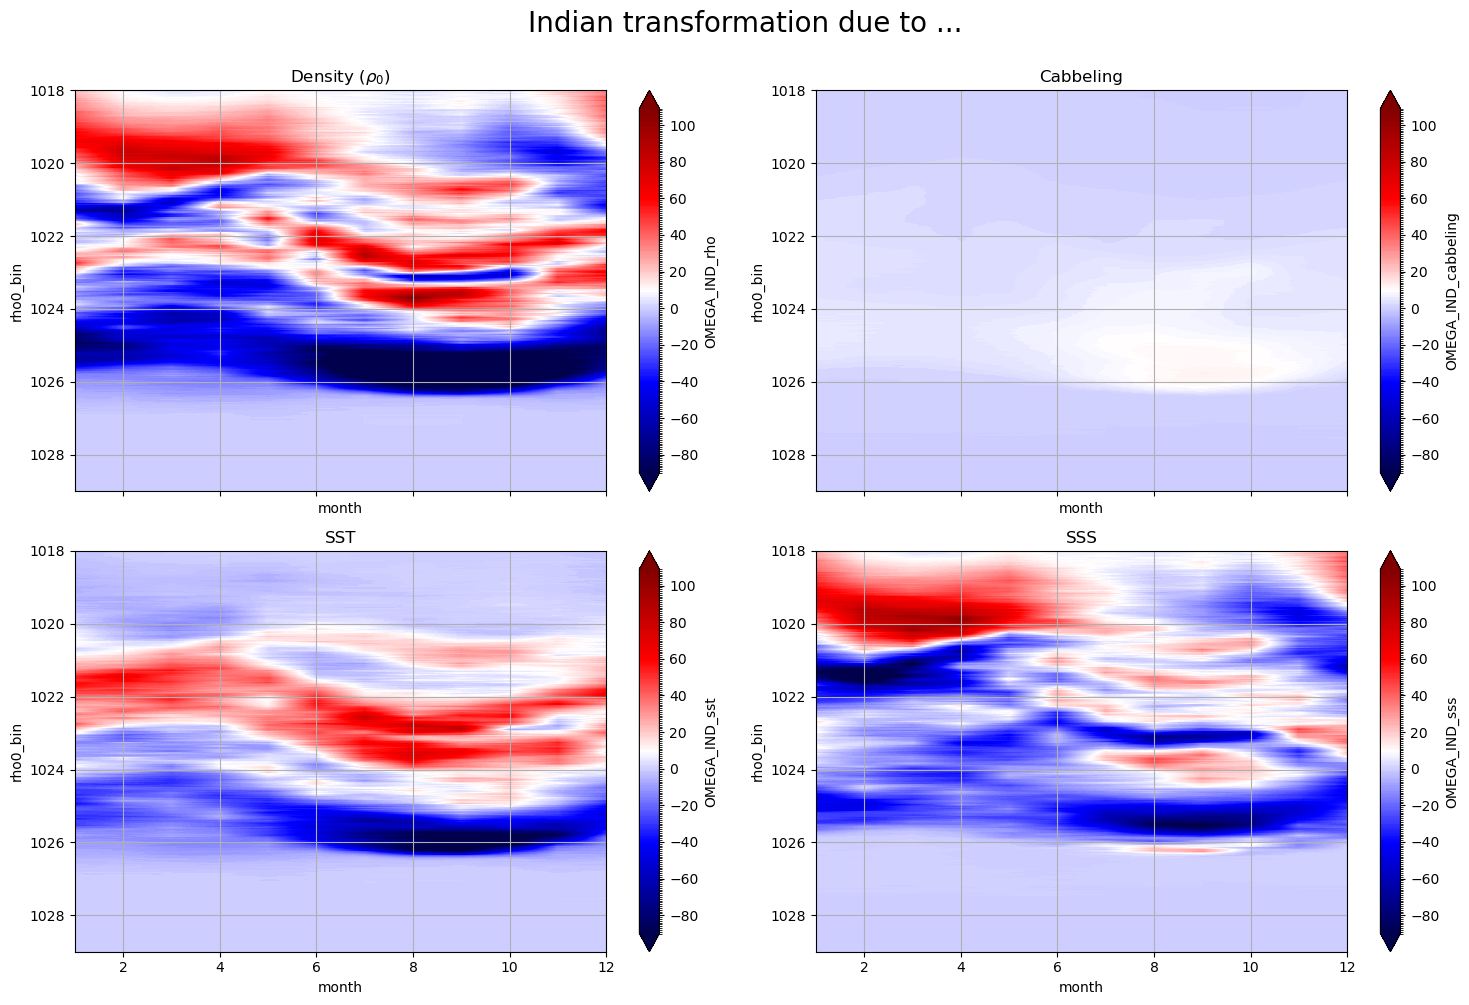

In [68]:
plotting(clim_ind, 'IND_', 'Indian')

## 3d) ARC monthly climatology

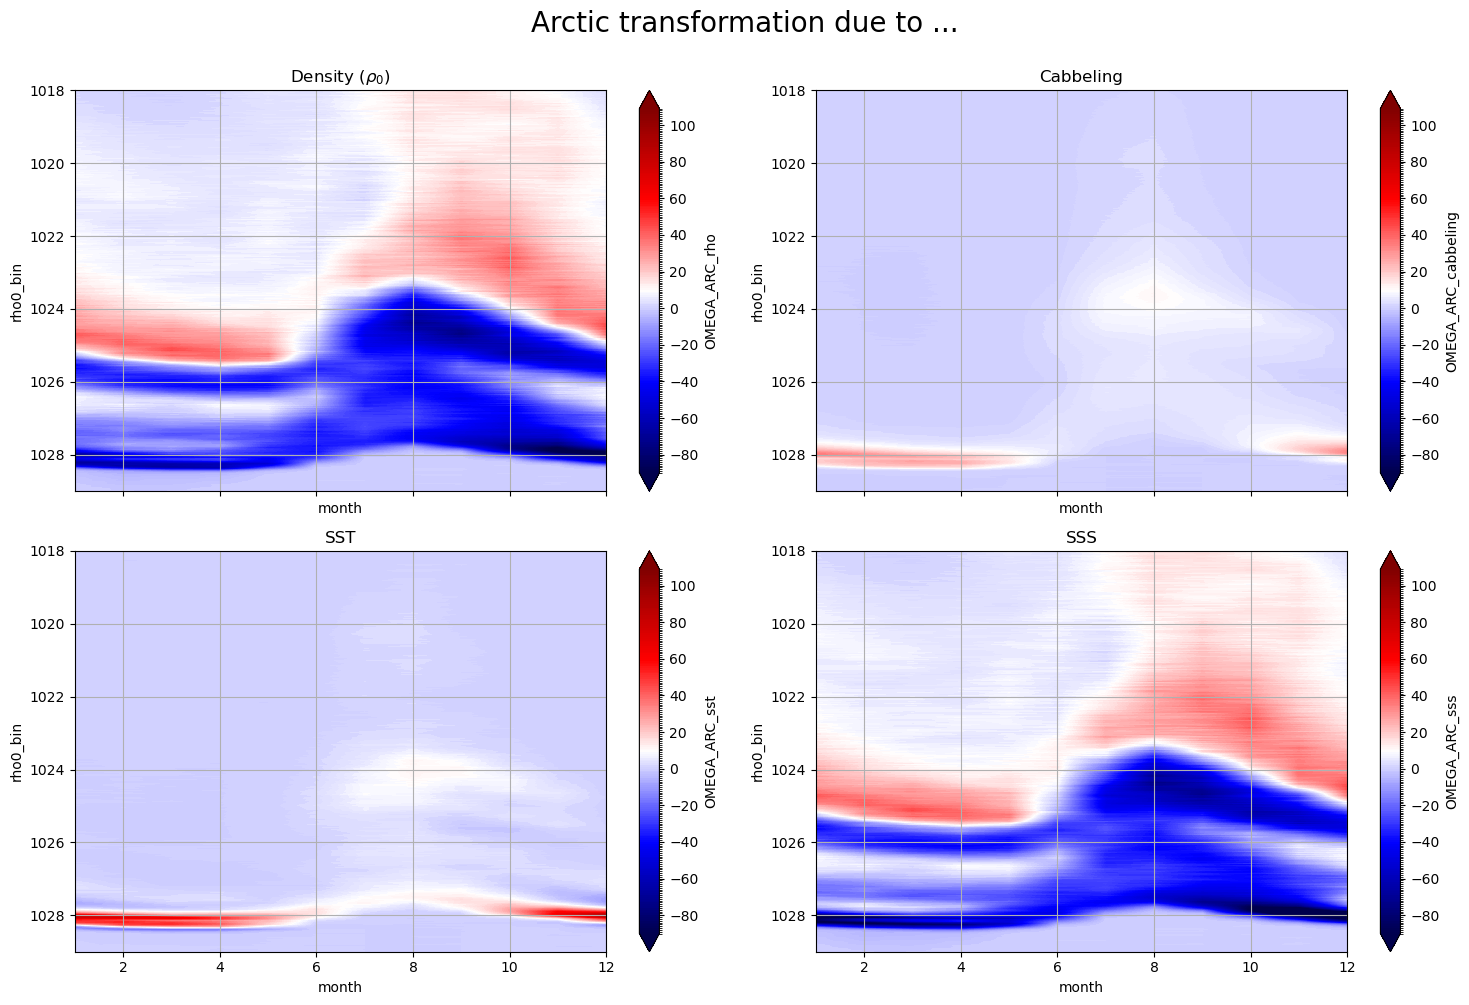

In [69]:
plotting(clim_arc, 'ARC_', 'Arctic')

## 3e) South monthly climatology

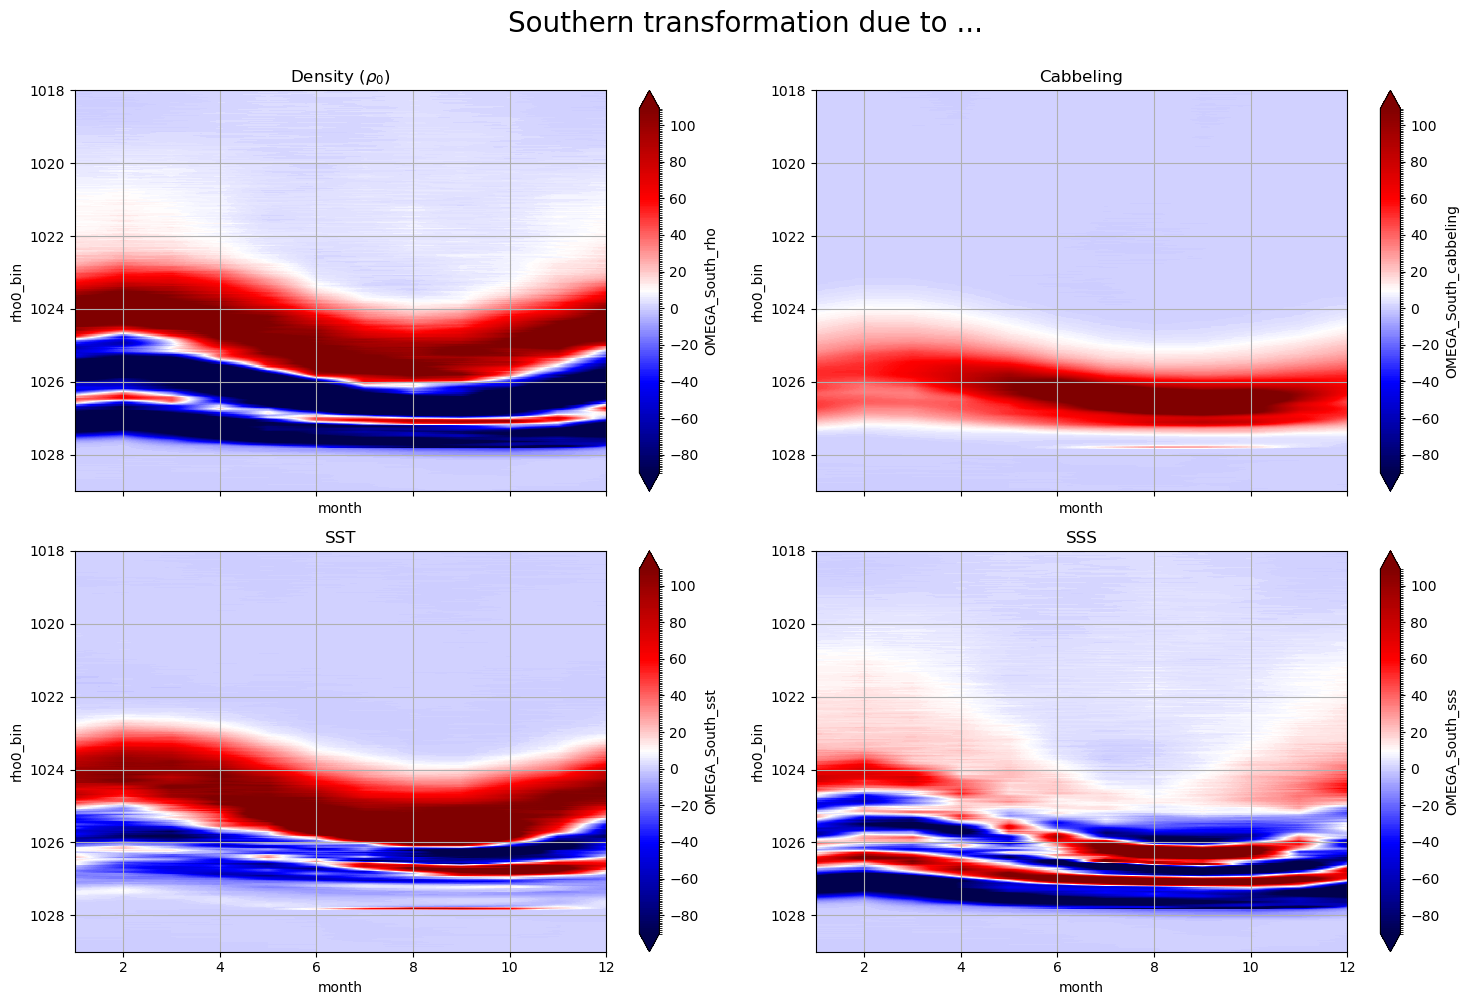

In [70]:
plotting(clim_south, 'South_', 'Southern')